In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# **Load Data**

In [ ]:
https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data

In [ ]:
df = pd.read_csv('/content/jobs_in_data.csv')

# **Preliminary Look and Data Cleansing**

## Sample of data

In [ ]:
df.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

# **General Information & Missing Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


# **Drop missing values**

In [ ]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

# **Drop duplicated rows**

In [ ]:
df.duplicated().sum()

4014

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.to_csv('file_bersih.csv', index=False)

In [ ]:
df.duplicated().sum()

0

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/file_bersih.csv')

In [ ]:
df.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

# **Data Understanding**

In [ ]:
categoricals = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
                       'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']

numericals = ['work_year','salary', 'salary_in_usd']

In [ ]:
df[numericals].describe()

work_year         salary  salary_in_usd
count  5341.000000    5341.000000    5341.000000
mean   2022.682082  145814.937839  146258.409099
std       0.608026   67025.469452   66594.117529
min    2020.000000   14000.000000   15000.000000
25%    2022.000000   97300.000000   98506.000000
50%    2023.000000  140000.000000  140000.000000
75%    2023.000000  186200.000000  186000.000000
max    2023.000000  450000.000000  450000.000000

In [ ]:
cols = ['work_year','salary', 'salary_in_usd']
for col in cols:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of work_year column
2023    3980
2022    1095
2021     195
2020      71
Name: work_year, dtype: int64 

Value counts of salary column
100000    108
150000     87
120000     84
80000      73
200000     70
         ... 
172100      1
175750      1
136742      1
172758      1
412000      1
Name: salary, Length: 1507, dtype: int64 

Value counts of salary_in_usd column
100000    85
150000    81
120000    73
200000    64
160000    63
          ..
258384     1
134326     1
173800     1
304200     1
412000     1
Name: salary_in_usd, Length: 1786, dtype: int64 



Observation:
1. The highest rank in the salary column is
100000 with 108.
2. The highest rank in salary_in_usd column is
100000 with 85.
3. The highest rank in work_year column is 2023 with 3980



In [ ]:
df[categoricals].describe()

job_title               job_category salary_currency  \
count            5341                       5341            5341   
unique            125                         10              11   
top     Data Engineer  Data Science and Research             USD   
freq             1100                       1655            4707   

       employee_residence experience_level employment_type work_setting  \
count                5341             5341            5341         5341   
unique                 83                4               4            3   
top         United States           Senior       Full-time    In-person   
freq                 4255             3444            5296         2913   

       company_location company_size  
count              5341         5341  
unique               70            3  
top       United States            M  
freq               4301         4688

In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of job_title column
Data Engineer                    1100
Data Scientist                   1039
Data Analyst                      744
Machine Learning Engineer         518
Analytics Engineer                207
                                 ... 
Deep Learning Researcher            1
Analytics Engineering Manager       1
BI Data Engineer                    1
Power BI Developer                  1
Marketing Data Engineer             1
Name: job_title, Length: 125, dtype: int64 

Value counts of job_category column
Data Science and Research         1655
Data Engineering                  1160
Machine Learning and AI            917
Data Analysis                      809
Leadership and Management          351
BI and Visualization               188
Data Architecture and Modeling     162
Data Management and Strategy        49
Data Quality and Operations         45
Cloud and Database                   5
Name: job_category, dtype: int64 

Value counts of salary_currency column
USD 

Observation:
1. The highest rank in the job_title column is Data Engineer with 1100.
2. The highest rank in the job_category column is Data Science and Research with 1655.
3. The highest rank in the salary_currency column is
USD with 4707.
4. The highest rank in the employee_residence column is
United States with 4255.
5. The highest rank in the experience_level column is
Senior with 3444.
6. The highest rank in the employment_type column is
Full-time with 5296.
7. The highest rank in the work_setting column is
In-person with 2913.
8. The highest rank in the company_location column is
United States with 4301.
9. The highest rank in the company_size column is
M with 4688.

## **Univariate Analysis**

## Boxplot to detect outliers

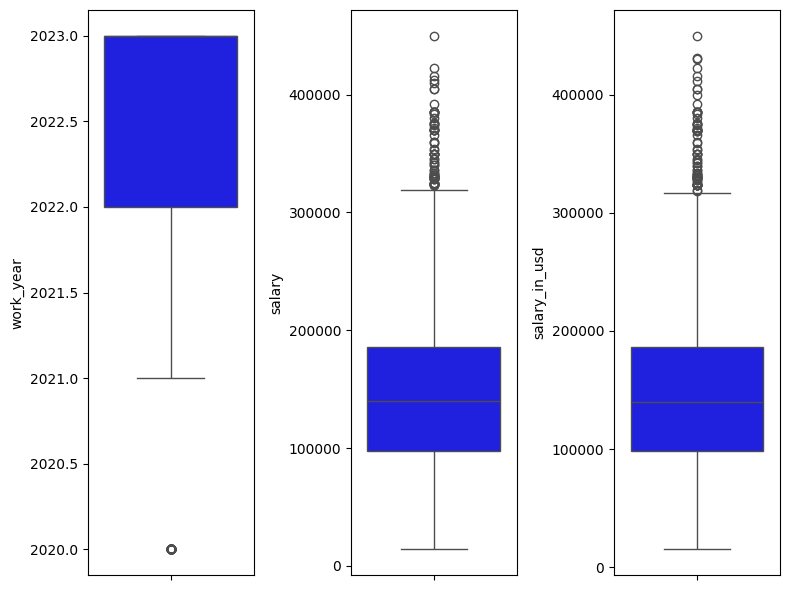

In [ ]:
plt.figure(figsize=(8,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()

In [ ]:
outlier = df['work_year'].min()
df[df['work_year'] == outlier]

work_year                       job_title               job_category  \
1475       2020             Azure Data Engineer           Data Engineering   
1596       2020              Staff Data Analyst              Data Analysis   
2555       2020            Staff Data Scientist  Data Science and Research   
2772       2020                    Data Analyst              Data Analysis   
2789       2020  Managing Director Data Science  Data Science and Research   
...         ...                             ...                        ...   
5330       2020                   Data Engineer           Data Engineering   
5331       2020       Machine Learning Engineer    Machine Learning and AI   
5337       2020                  Data Scientist  Data Science and Research   
5339       2020                  Data Scientist  Data Science and Research   
5340       2020           Business Data Analyst              Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
1475             USD  100000         100000          Mauritius   
1596             CAD   60000          44753             Canada   
2555             USD  164000         164000      United States   
2772             EUR   42000          47899            Germany   
2789             USD  300000         300000      United States   
...              ...     ...            ...                ...   
5330             USD  130800         130800              Spain   
5331             EUR   40000          45618            Croatia   
5337             USD  412000         412000      United States   
5339             USD  105000         105000      United States   
5340             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
1475      Entry-level       Full-time    In-person        Mauritius   
1596      Entry-level        Contract       Hybrid           Canada   
2555           Senior       Full-time       Hybrid    United States   
2772      Entry-level       Full-time    In-person          Germany   
2789        Executive       Full-time       Remote    United States   
...               ...             ...          ...              ...   
5330        Mid-level       Full-time       Remote    United States   
5331           Senior       Full-time       Remote          Croatia   
5337           Senior       Full-time       Remote    United States   
5339      Entry-level       Full-time       Remote    United States   
5340      Entry-level        Contract       Remote    United States   

     company_size  
1475            S  
1596            L  
2555            M  
2772            L  
2789            L  
...           ...  
5330            M  
5331            S  
5337            L  
5339            S  
5340            L  

[71 rows x 12 columns]

Obervation:
1. There is no one outlier in the salary and salary_in_usd column
2. Work_year have outlier in 2020
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

# **KDE plot for knowing the distribution form**

In [ ]:
plt.figure(figsize=(8,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

Obervation:
1. 2023 it was experience the highest increase
2. salary and salary_in_usd have same variable are around 150000
3. The true continuous numeric features: salary and salary_in_usd, which is good (no need to transform them to approximate normal distribution if we later want to do modelling).

# **Multivariate Analysis**

In [ ]:
df.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

<ipython-input-33-e9c412723d1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

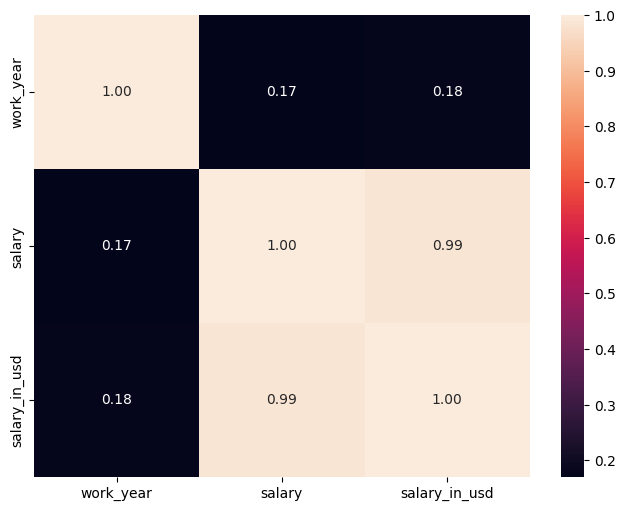

In [ ]:
plt.figure(figsize=(8,6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

**Observation**
1. salary and salary_in_usd are highly correlated each other namely 0,99

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/file_bersih.csv')

In [ ]:
df.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

In [ ]:
numericals= ['work_year','salary', 'salary_in_usd']
numerical_data = df[numericals]

# **Interpretation**

In [ ]:
sns.pairplot(numerical_data)
plt.show()

In [ ]:
sns.pairplot(df, hue='work_year')
plt.show()

Observation :
1. 2023 was have the highest increase.

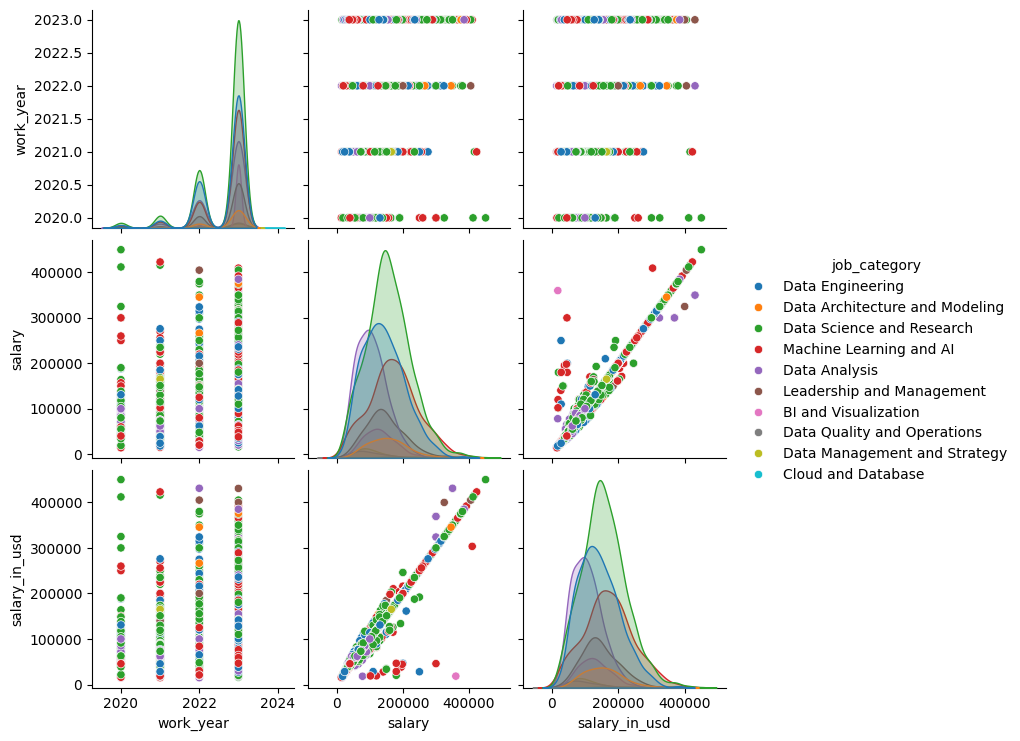

In [ ]:
sns.pairplot(df, hue='job_category')
plt.show()

Obeservation:
1. Judging from the work_year in 2020-2023, continues to increase jobs in data.
2. Judging from the salary and salary_in_usd, data science and research are ranked the highest around 400000.

# **Deep dive exploration**

1. **What type of job_category is most popular with jobs in data in US and Europe?**

In [ ]:
jobs = df.groupby('job_category')['work_year'].count()
print(jobs)
jobs_mean = df.groupby('job_category')['salary'].mean()
print(jobs)

job_category
BI and Visualization               188
Cloud and Database                   5
Data Analysis                      809
Data Architecture and Modeling     162
Data Engineering                  1160
Data Management and Strategy        49
Data Quality and Operations         45
Data Science and Research         1655
Leadership and Management          351
Machine Learning and AI            917
Name: work_year, dtype: int64
job_category
BI and Visualization               188
Cloud and Database                   5
Data Analysis                      809
Data Architecture and Modeling     162
Data Engineering                  1160
Data Management and Strategy        49
Data Quality and Operations         45
Data Science and Research         1655
Leadership and Management          351
Machine Learning and AI            917
Name: work_year, dtype: int64


In [ ]:
plt.figure(figsize=(7,5))
jobs.plot(fontsize=13, label = 'Value Jobs Category', secondary_y=True,color='green',marker='x')
jobs_mean.plot.bar(color='yellow',fontsize=13, label = 'average salary')
plt.xlabel('Job Category')
plt.ylabel('salary')
plt.title(label='Job Category from Salary', fontdict={'fontsize': 13, 'color':'black'}, loc='center')
plt.legend()
plt.tight_layout()

**Data Science and Research is the most popular from jobs in data, namely at 1655 **

**Machine learning and AI ranks highest for salary*

# **MACHINE LEARNING**

# **CLUSTERING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/file_bersih.csv')
df.sample(5)

work_year             job_title               job_category  \
4473       2022         Data Engineer           Data Engineering   
4870       2022  Data Science Manager  Data Science and Research   
4902       2022    Lead Data Engineer           Data Engineering   
2914       2023          Data Analyst              Data Analysis   
3294       2023     Applied Scientist  Data Science and Research   

     salary_currency  salary  salary_in_usd employee_residence  \
4473             USD  110000         110000      United States   
4870             AUD  193000         133766          Australia   
4902             CAD  150000         115222             Canada   
2914             USD  106400         106400     United Kingdom   
3294             USD  213660         213660      United States   

     experience_level employment_type work_setting company_location  \
4473           Senior       Full-time    In-person    United States   
4870           Senior       Full-time       Remote        Australia   
4902        Executive       Full-time       Remote           Canada   
2914           Senior       Full-time    In-person   United Kingdom   
3294      Entry-level       Full-time    In-person    United States   

     company_size  
4473            M  
4870            L  
4902            S  
2914            M  
3294            L

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 500.8+ KB


In [ ]:
df.describe()

work_year         salary  salary_in_usd
count  5341.000000    5341.000000    5341.000000
mean   2022.682082  145814.937839  146258.409099
std       0.608026   67025.469452   66594.117529
min    2020.000000   14000.000000   15000.000000
25%    2022.000000   97300.000000   98506.000000
50%    2023.000000  140000.000000  140000.000000
75%    2023.000000  186200.000000  186000.000000
max    2023.000000  450000.000000  450000.000000

In [ ]:
num_columns = ['work_year','salary', 'salary_in_usd']
cat_columns = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
                       'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']

for numerical in num_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=numerical)

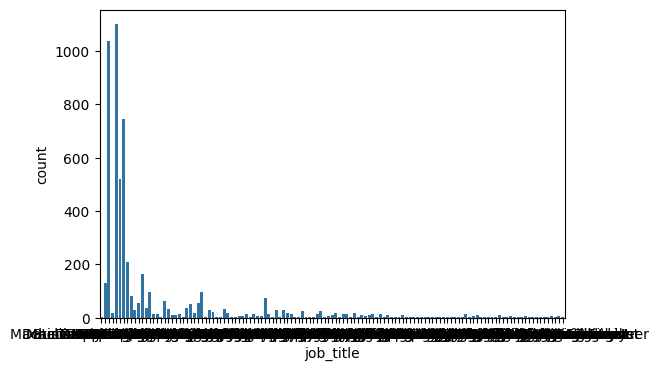

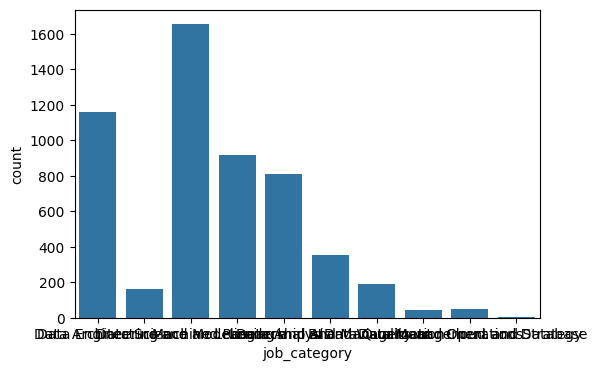

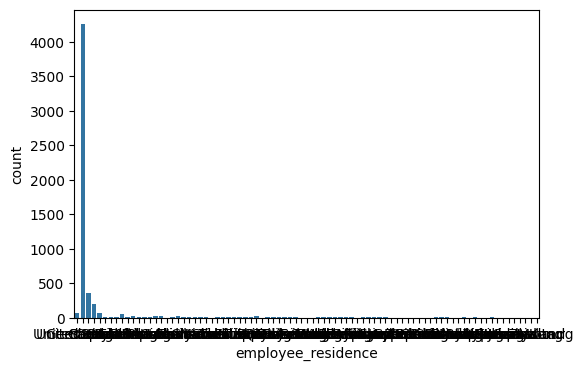

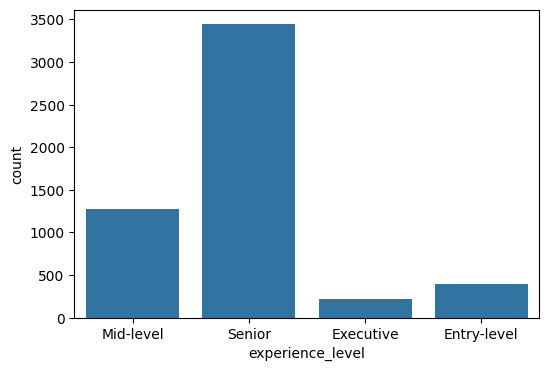

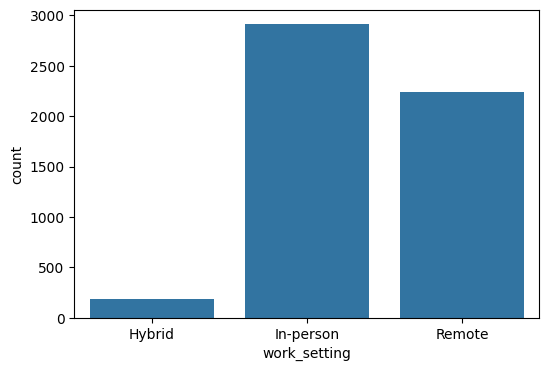

In [ ]:
for category in cat_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=category)

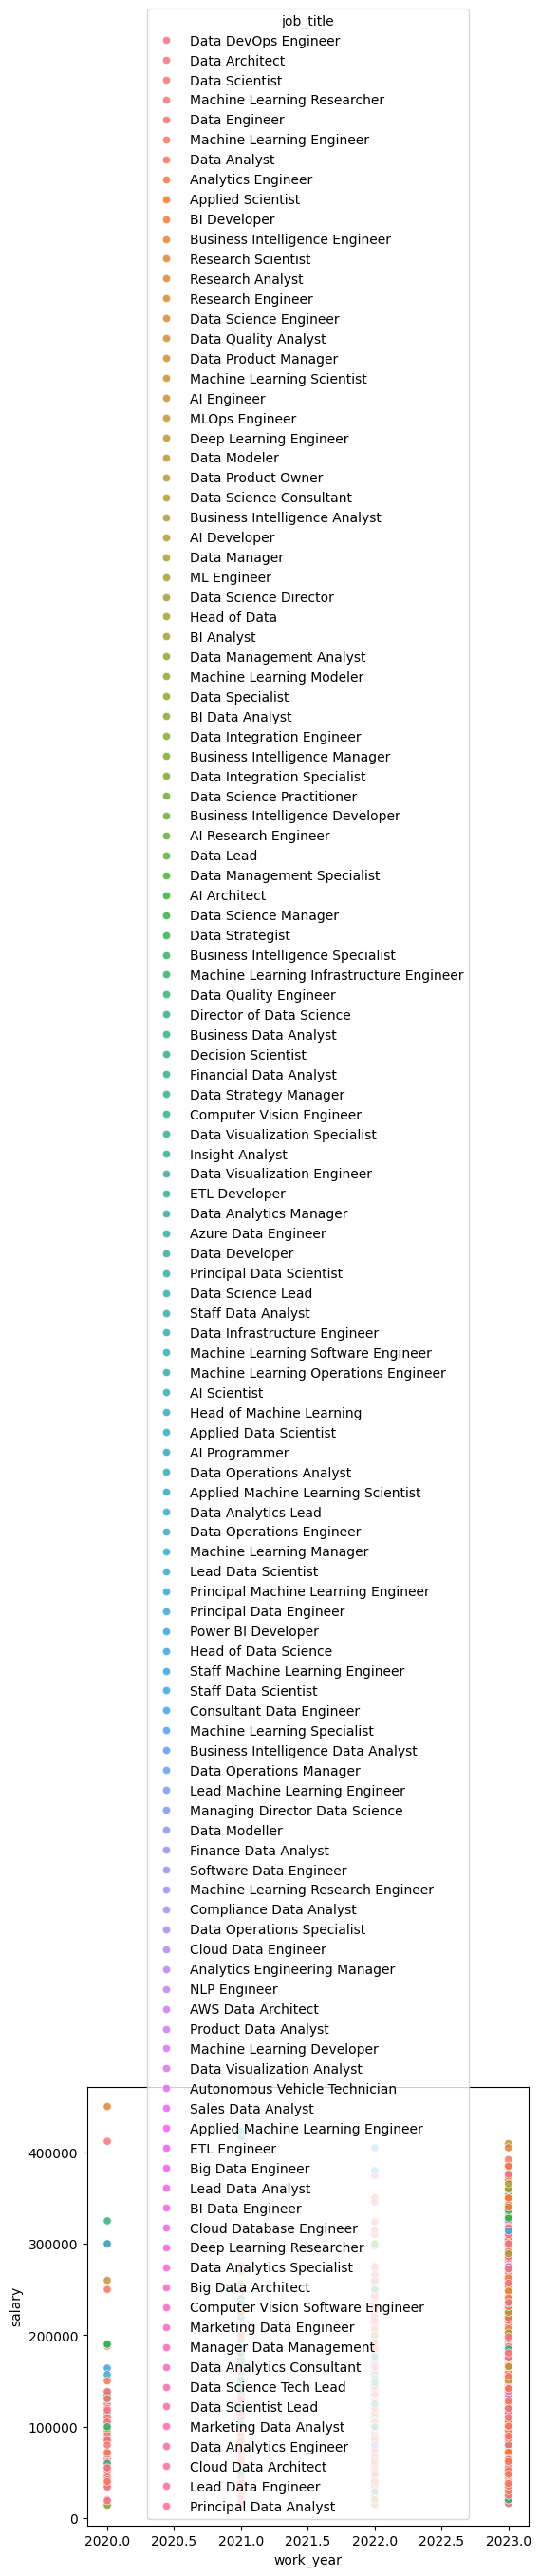

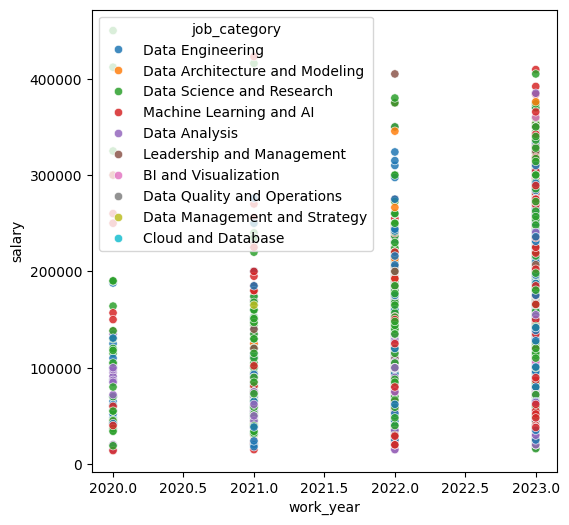

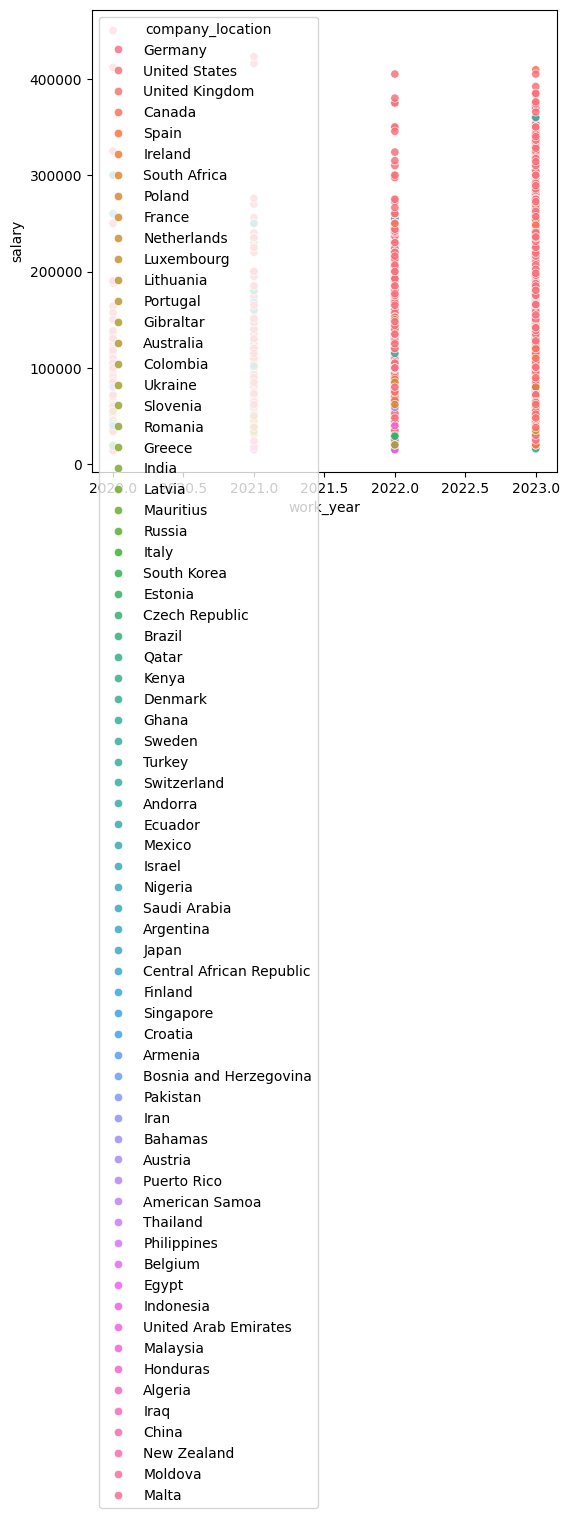

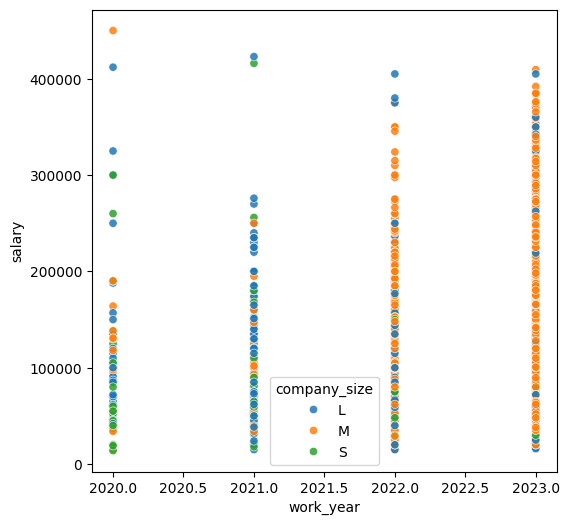

In [ ]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

for cat in cat_columns:
    bivariate_scatter('work_year', 'salary', 'job_category_encoded', cat, df)

# Feature Engineering

In [ ]:
df_transformed = df.drop(['job_title', 'job_category', 'salary_currency', 'employee_residence',
                       'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size'], axis=1)
df_transformed

work_year  salary  salary_in_usd
0          2023   88000          95012
1          2023  186000         186000
2          2023   81800          81800
3          2023  212000         212000
4          2023   93300          93300
...         ...     ...            ...
5336       2021  165000         165000
5337       2020  412000         412000
5338       2021  151000         151000
5339       2020  105000         105000
5340       2020  100000         100000

[5341 rows x 3 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df_transformed)
X[0]

array([1.        , 0.16972477, 0.18393563])

# Clustering K-Means

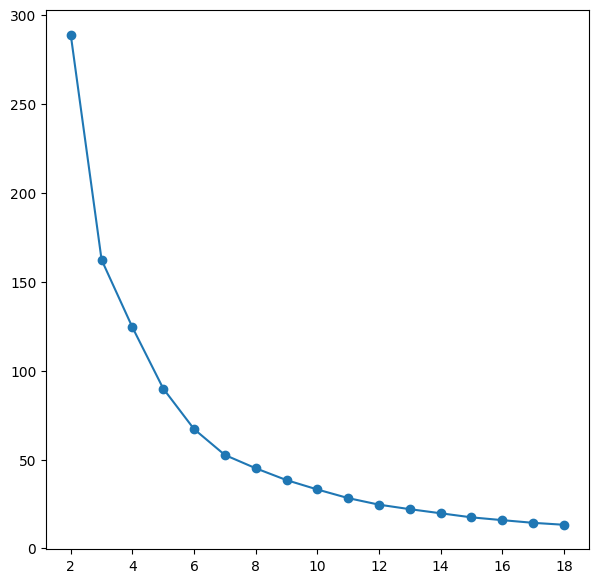

In [ ]:
from sklearn.cluster import KMeans

clusters_range = range(2,19)
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0, n_init=10).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

# **Evaluation**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_

array([2, 1, 2, ..., 5, 5, 5], dtype=int32)

In [ ]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 500.8+ KB


In [ ]:
results_df = df.drop(['work_year'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'salary':'int64', 'salary_in_usd':'int64'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           5341 non-null   object
 1   job_category        5341 non-null   object
 2   salary_currency     5341 non-null   object
 3   salary              5341 non-null   int64 
 4   salary_in_usd       5341 non-null   int64 
 5   employee_residence  5341 non-null   object
 6   experience_level    5341 non-null   object
 7   employment_type     5341 non-null   object
 8   work_setting        5341 non-null   object
 9   company_location    5341 non-null   object
 10  company_size        5341 non-null   object
 11  Labels              5341 non-null   int32 
dtypes: int32(1), int64(2), object(9)
memory usage: 480.0+ KB


In [ ]:
results_df

job_title                    job_category  \
0         Data DevOps Engineer                Data Engineering   
1               Data Architect  Data Architecture and Modeling   
2               Data Architect  Data Architecture and Modeling   
3               Data Scientist       Data Science and Research   
4               Data Scientist       Data Science and Research   
...                        ...                             ...   
5336           Data Specialist    Data Management and Strategy   
5337            Data Scientist       Data Science and Research   
5338  Principal Data Scientist       Data Science and Research   
5339            Data Scientist       Data Science and Research   
5340     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0                EUR   88000          95012            Germany   
1                USD  186000         186000      United States   
2                USD   81800          81800      United States   
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
...              ...     ...            ...                ...   
5336             USD  165000         165000      United States   
5337             USD  412000         412000      United States   
5338             USD  151000         151000      United States   
5339             USD  105000         105000      United States   
5340             USD  100000         100000      United States   

     experience_level employment_type work_setting company_location  \
0           Mid-level       Full-time       Hybrid          Germany   
1              Senior       Full-time    In-person    United States   
2              Senior       Full-time    In-person    United States   
3              Senior       Full-time    In-person    United States   
4              Senior       Full-time    In-person    United States   
...               ...             ...          ...              ...   
5336           Senior       Full-time       Remote    United States   
5337           Senior       Full-time       Remote    United States   
5338        Mid-level       Full-time       Remote    United States   
5339      Entry-level       Full-time       Remote    United States   
5340      Entry-level        Contract       Remote    United States   

     company_size  Labels  
0               L       2  
1               M       1  
2               M       2  
3               M       1  
4               M       2  
...           ...     ...  
5336            L       5  
5337            L       0  
5338            L       5  
5339            S       5  
5340            L       5  

[5341 rows x 12 columns]

# Interpretation

In [ ]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T

**CLUSTER 0**

In [ ]:
summary[0]

count           mean           std       min       25%  \
salary         497.0  186785.400402  40250.437022  138600.0  155000.0   
salary_in_usd  497.0  186376.398390  40171.935198  125976.0  155000.0   
Labels         497.0       0.000000      0.000000       0.0       0.0   

                    50%       75%       max  
salary         180000.0  205300.0  450000.0  
salary_in_usd  180000.0  205000.0  450000.0  
Labels              0.0       0.0       0.0

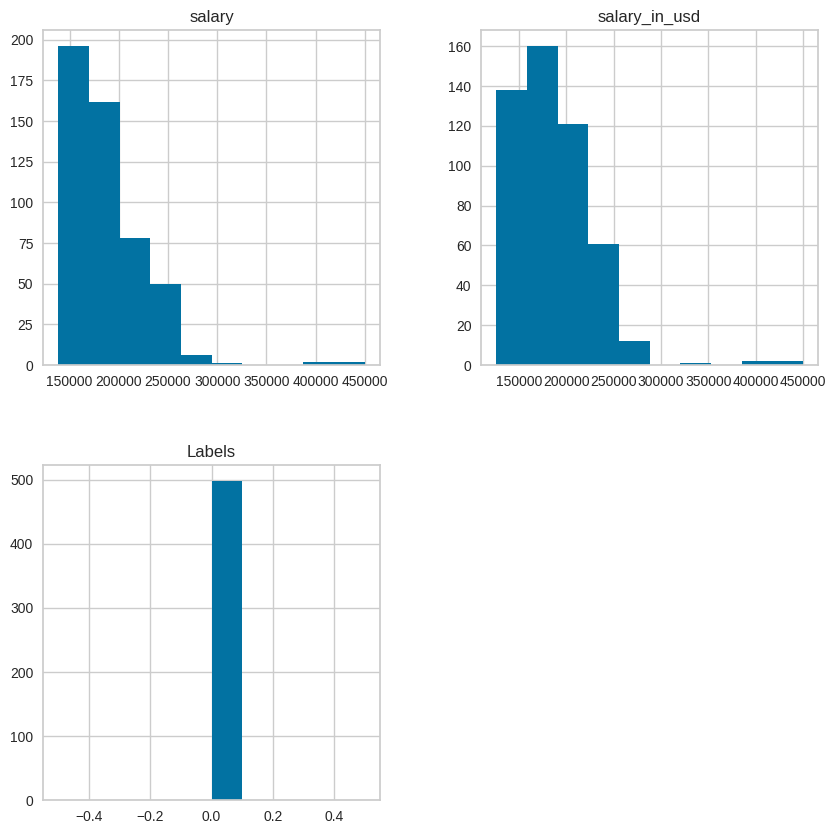

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(10,10));

**CLUSTER 1**

In [ ]:
summary[1]

count           mean           std       min       25%  \
salary         1767.0  166412.880589  24914.012170  120000.0  145000.0   
salary_in_usd  1767.0  166457.624222  24785.922401   18381.0  145000.0   
Labels         1767.0       1.000000      0.000000       1.0       1.0   

                    50%       75%       max  
salary         165000.0  185900.0  360000.0  
salary_in_usd  165000.0  185900.0  215936.0  
Labels              1.0       1.0       1.0

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(10,10));

**CLUSTER 2**

In [ ]:
summary[2]

count          mean           std      min      25%      50%  \
salary         1546.0  88458.301423  27093.817295  16000.0  70000.0  90700.0   
salary_in_usd  1546.0  89715.025873  26140.829952  16000.0  70374.0  92490.0   
Labels         1546.0      2.000000      0.000000      2.0      2.0      2.0   

                    75%       max  
salary         111000.0  200000.0  
salary_in_usd  111512.5  138666.0  
Labels              2.0       2.0

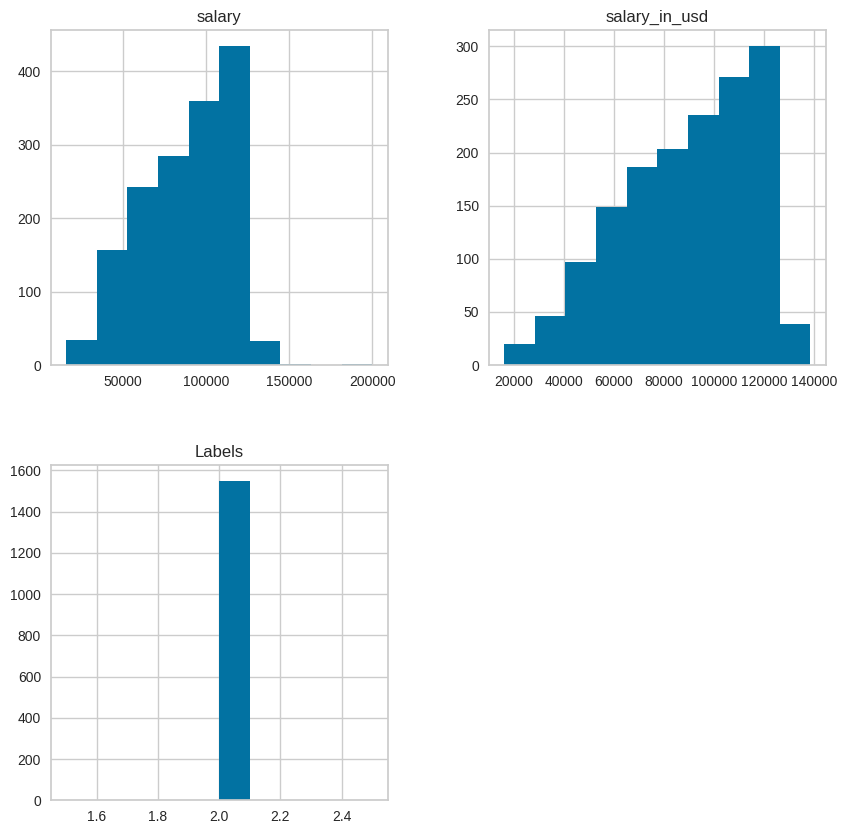

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(10,10));

**CLUSTER 3**

In [ ]:
summary[3]

count          mean           std      min      25%      50%  \
salary         610.0  89237.626230  32582.311777  15000.0  63225.0  92625.0   
salary_in_usd  610.0  90272.190164  31375.151763  15000.0  65000.0  94780.0   
Labels         610.0      3.000000      0.000000      3.0      3.0      3.0   

                    75%       max  
salary         118750.0  198000.0  
salary_in_usd  117000.0  137400.0  
Labels              3.0       3.0

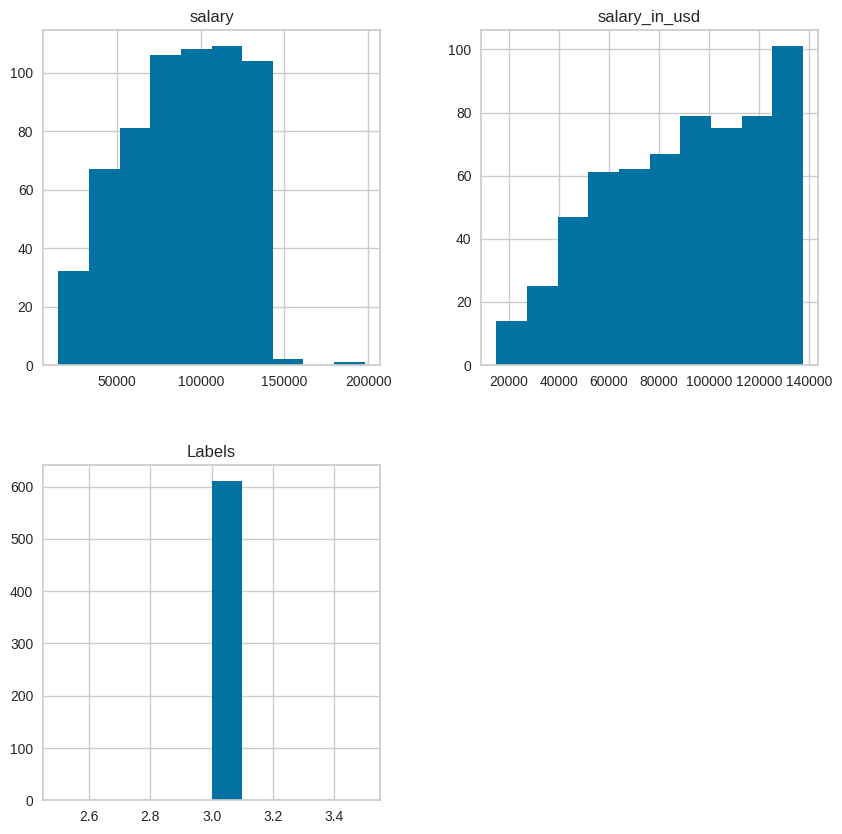

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(10,10));

**CLUSTER 4**

In [ ]:
summary[4]

count           mean           std       min       25%  \
salary         682.0  262188.599707  40539.190955  200000.0  230000.0   
salary_in_usd  682.0  262921.560117  41570.255076  214500.0  230000.0   
Labels         682.0       4.000000      0.000000       4.0       4.0   

                    50%       75%       max  
salary         250150.0  285000.0  409500.0  
salary_in_usd  250150.0  285000.0  430967.0  
Labels              4.0       4.0       4.0

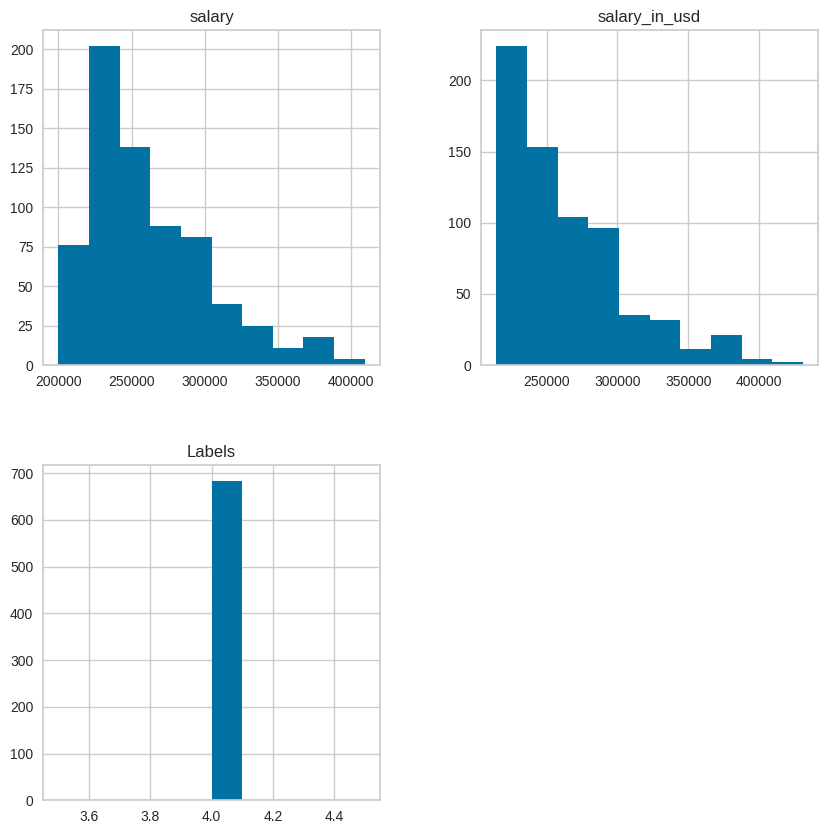

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(10,10));

**CLUSTER 5**

In [ ]:
summary[5]

count          mean           std      min      25%      50%  \
salary         239.0  91671.832636  51470.840431  14000.0  53500.0  81000.0   
salary_in_usd  239.0  89240.589958  47161.780143  15000.0  54871.0  82500.0   
Labels         239.0      5.000000      0.000000      5.0      5.0      5.0   

                    75%       max  
salary         120000.0  300000.0  
salary_in_usd  115000.0  300000.0  
Labels              5.0       5.0

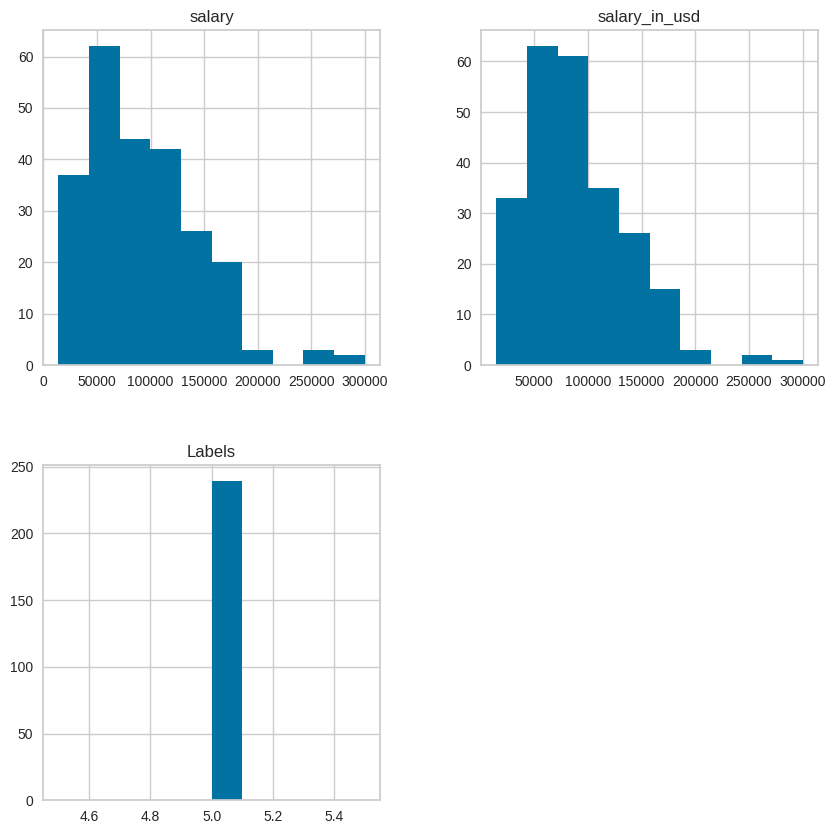

In [ ]:
results_df[results_df['Labels'] == 5].hist(figsize=(10,10));

# Hierarchical Clustering

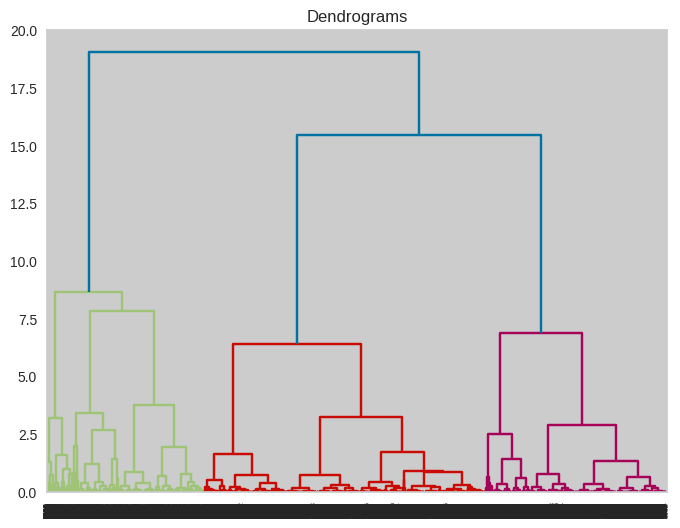

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8, 6))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
hcluster.fit_predict(X)

array([0, 2, 0, ..., 3, 3, 3])

In [ ]:
labels = hcluster.labels_
X_pca_df['Labels'] = labels

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

**CLUSTERING JOB CATEGORY**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('/content/file_bersih.csv')
df.sample(5)

work_year                  job_title               job_category  \
4117       2022          Applied Scientist  Data Science and Research   
303        2023  Machine Learning Engineer    Machine Learning and AI   
2610       2023         Analytics Engineer  Leadership and Management   
4019       2023  Machine Learning Engineer    Machine Learning and AI   
1491       2023              Data Engineer           Data Engineering   

     salary_currency  salary  salary_in_usd employee_residence  \
4117             USD  192000         192000      United States   
303              USD  146600         146600      United States   
2610             USD  140000         140000      United States   
4019             GBP   48000          59059     United Kingdom   
1491             GBP   50000          61520     United Kingdom   

     experience_level employment_type work_setting company_location  \
4117           Senior       Full-time       Remote    United States   
303            Senior       Full-time    In-person    United States   
2610           Senior       Full-time       Remote    United States   
4019        Mid-level       Full-time       Remote   United Kingdom   
1491           Senior       Full-time    In-person   United Kingdom   

     company_size  
4117            M  
303             M  
2610            M  
4019            M  
1491            M

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5341 non-null   int64 
 1   job_title           5341 non-null   object
 2   job_category        5341 non-null   object
 3   salary_currency     5341 non-null   object
 4   salary              5341 non-null   int64 
 5   salary_in_usd       5341 non-null   int64 
 6   employee_residence  5341 non-null   object
 7   experience_level    5341 non-null   object
 8   employment_type     5341 non-null   object
 9   work_setting        5341 non-null   object
 10  company_location    5341 non-null   object
 11  company_size        5341 non-null   object
dtypes: int64(3), object(9)
memory usage: 500.8+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['job_category_encoded'] = le.fit_transform(df['job_category'])

In [20]:
df = pd.get_dummies(df, columns=['job_category'], prefix='job_category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   work_year                                    5341 non-null   int64 
 1   job_title                                    5341 non-null   object
 2   salary_currency                              5341 non-null   object
 3   salary                                       5341 non-null   int64 
 4   salary_in_usd                                5341 non-null   int64 
 5   employee_residence                           5341 non-null   object
 6   experience_level                             5341 non-null   object
 7   employment_type                              5341 non-null   object
 8   work_setting                                 5341 non-null   object
 9   company_location                             5341 non-null   object
 10  company_size

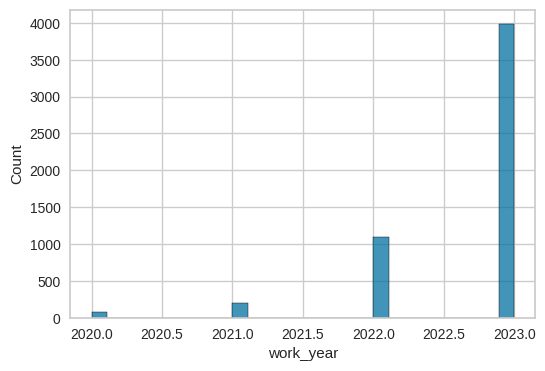

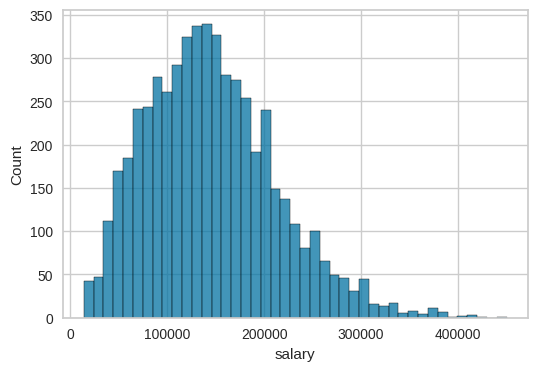

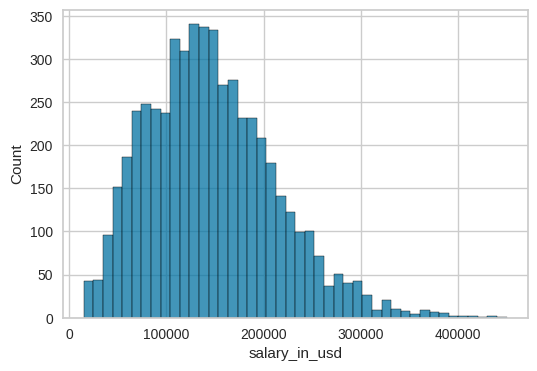

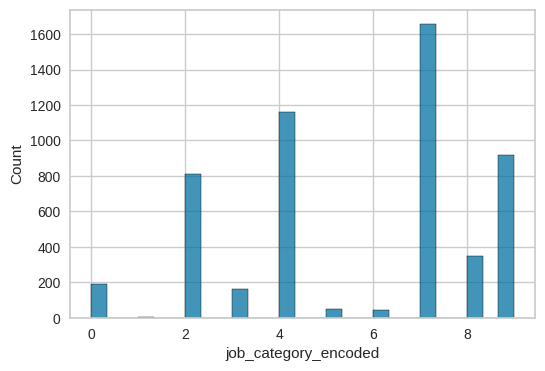

In [59]:
num_columns = ['work_year','salary', 'salary_in_usd', 'job_category_encoded']
cat_columns = ['job_title', 'salary_currency', 'employee_residence',
                       'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']

for numerical in num_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=numerical)

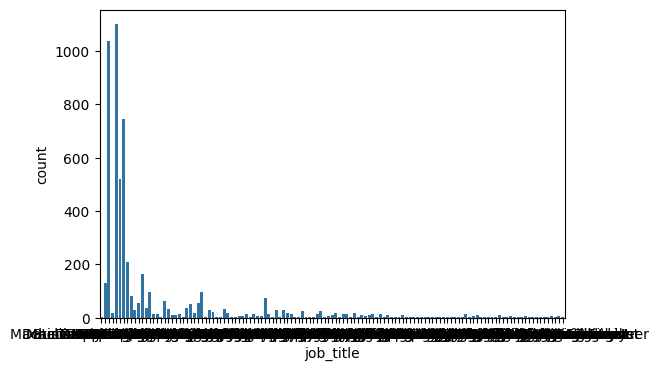

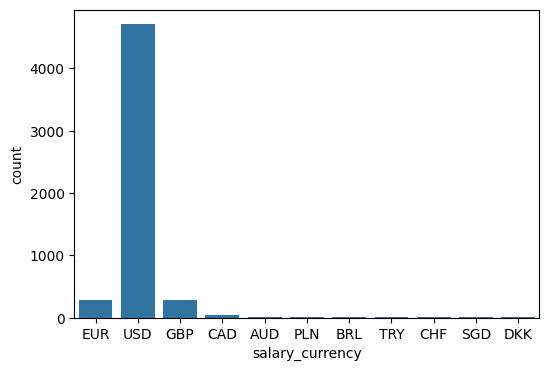

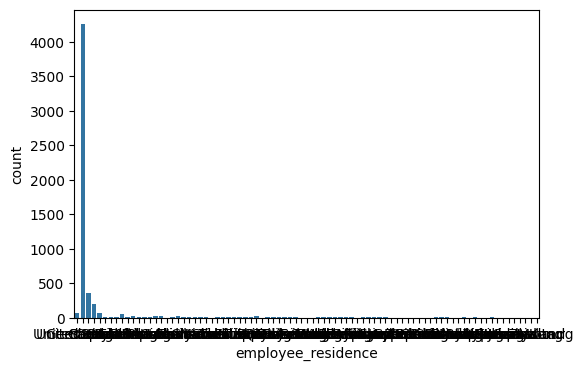

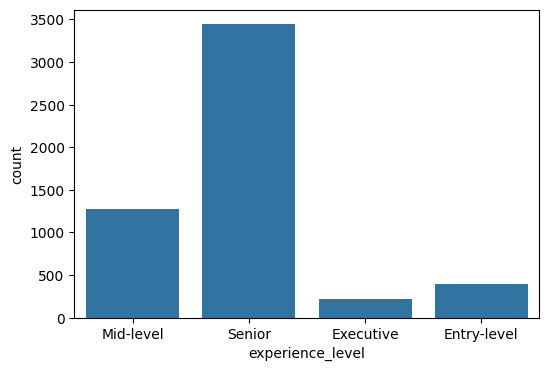

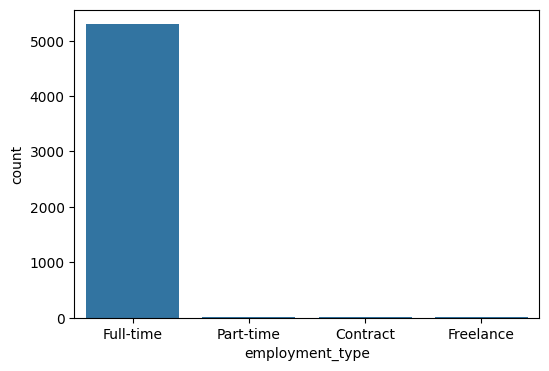

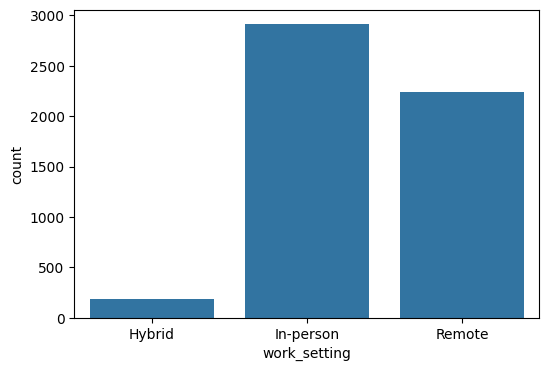

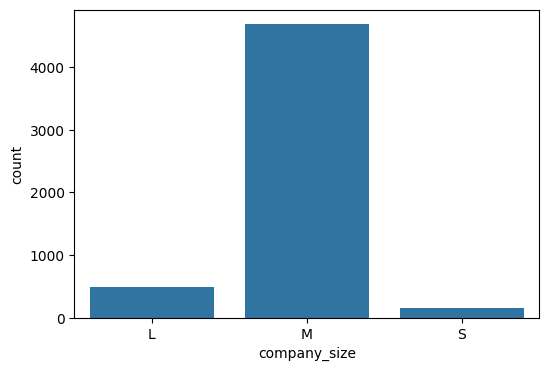

In [23]:
for category in cat_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=category)

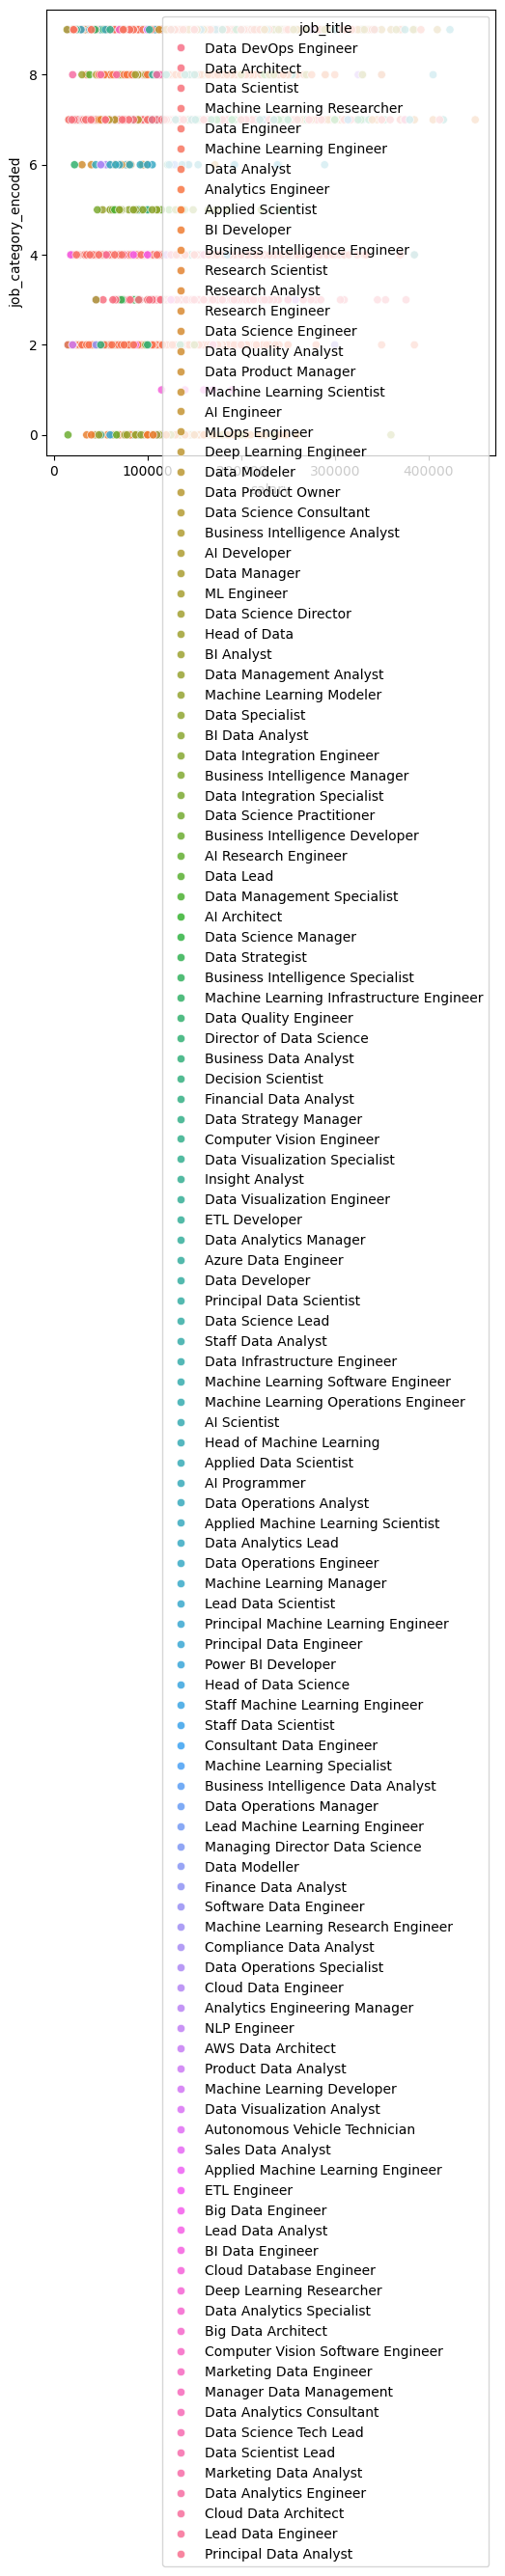

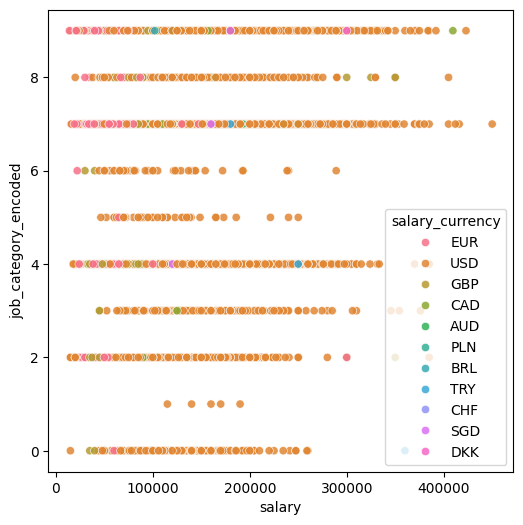

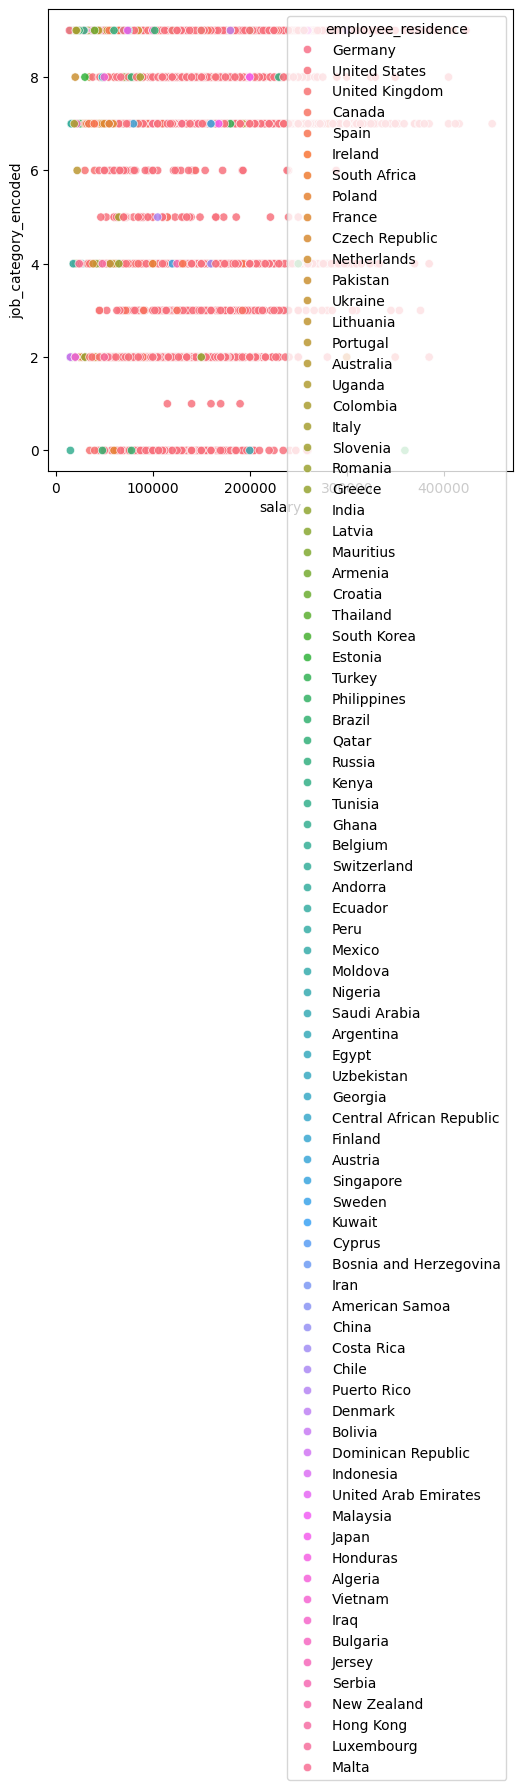

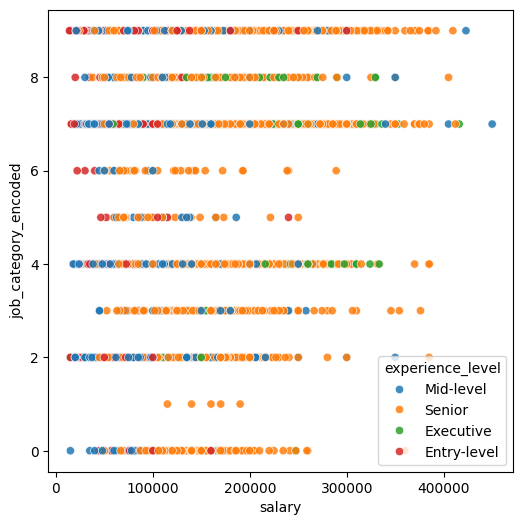

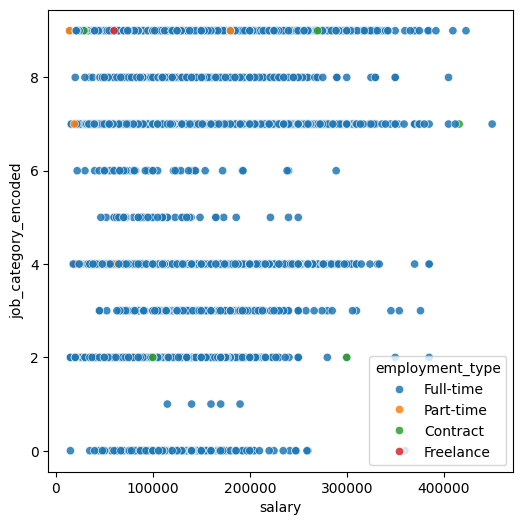

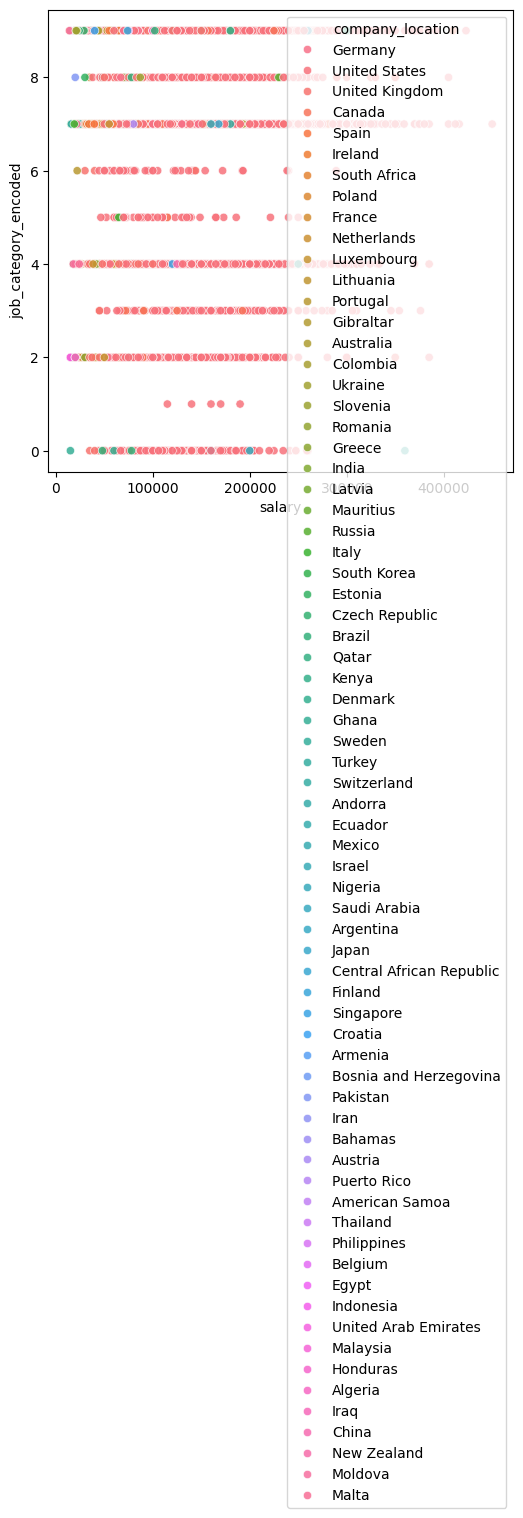

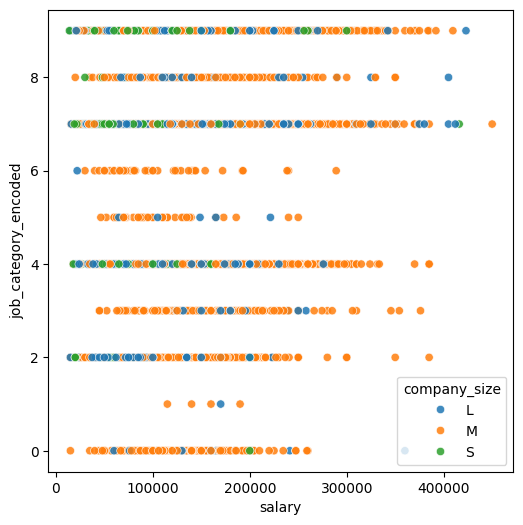

In [25]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

for cat in cat_columns:
    bivariate_scatter( 'salary', 'job_category_encoded', cat, df)

In [29]:
df_transformed = df.drop(['job_title','salary_currency','employee_residence','experience_level', 'employment_type','work_setting','company_location','company_size','salary_in_usd'], axis=1)
df_transformed

work_year  salary  job_category_encoded  \
0          2023   88000                     4   
1          2023  186000                     3   
2          2023   81800                     3   
3          2023  212000                     7   
4          2023   93300                     7   
...         ...     ...                   ...   
5336       2021  165000                     5   
5337       2020  412000                     7   
5338       2021  151000                     7   
5339       2020  105000                     7   
5340       2020  100000                     2   

      job_category_BI and Visualization  job_category_Cloud and Database  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
5336                                  0                                0   
5337                                  0                                0   
5338                                  0                                0   
5339                                  0                                0   
5340                                  0                                0   

      job_category_Data Analysis  job_category_Data Architecture and Modeling  \
0                              0                                            0   
1                              0                                            1   
2                              0                                            1   
3                              0                                            0   
4                              0                                            0   
...                          ...                                          ...   
5336                           0                                            0   
5337                           0                                            0   
5338                           0                                            0   
5339                           0                                            0   
5340                           1                                            0   

      job_category_Data Engineering  \
0                                 1   
1                                 0   
2                                 0   
3                                 0   
4                                 0   
...                             ...   
5336                              0   
5337                              0   
5338                              0   
5339                              0   
5340                              0   

      job_category_Data Management and Strategy  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
5336                                          1   
5337                                          0   
5338                                          0   
5339                                          0   
5340                                          0   

      job_category_Data Quality and Operations  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
5336                                         0   
5337                                         0   

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df_transformed)
X[0]

array([1.        , 0.16972477, 0.44444444, 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# Clustering K-Means

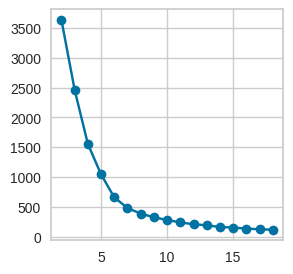

In [61]:
from sklearn.cluster import KMeans

clusters_range = range(2,19)
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0, n_init=10).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(3,3))
plt.plot(clusters_range,inertias, marker='o')

In [32]:
!pip install yellowbrick

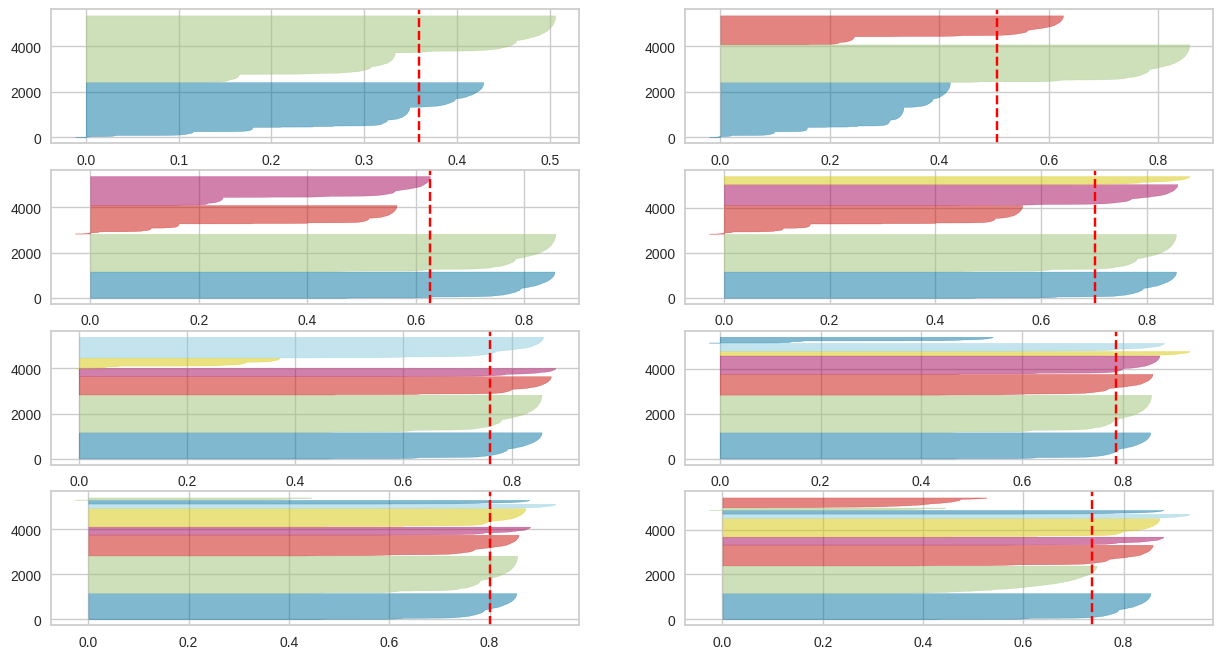

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

# Evaluation

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [35]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [36]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
kmeans.labels_

array([3, 0, 0, ..., 1, 1, 2], dtype=int32)

In [38]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [39]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [40]:
results_df = df.drop(['salary_in_usd'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'work_year':'int64','salary':'int64', 'job_category_encoded':'int64'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   work_year                                    5341 non-null   int64 
 1   job_title                                    5341 non-null   object
 2   salary_currency                              5341 non-null   object
 3   salary                                       5341 non-null   int64 
 4   employee_residence                           5341 non-null   object
 5   experience_level                             5341 non-null   object
 6   employment_type                              5341 non-null   object
 7   work_setting                                 5341 non-null   object
 8   company_location                             5341 non-null   object
 9   company_size                                 5341 non-null   object
 10  job_category

In [41]:
results_df

work_year                 job_title salary_currency  salary  \
0          2023      Data DevOps Engineer             EUR   88000   
1          2023            Data Architect             USD  186000   
2          2023            Data Architect             USD   81800   
3          2023            Data Scientist             USD  212000   
4          2023            Data Scientist             USD   93300   
...         ...                       ...             ...     ...   
5336       2021           Data Specialist             USD  165000   
5337       2020            Data Scientist             USD  412000   
5338       2021  Principal Data Scientist             USD  151000   
5339       2020            Data Scientist             USD  105000   
5340       2020     Business Data Analyst             USD  100000   

     employee_residence experience_level employment_type work_setting  \
0               Germany        Mid-level       Full-time       Hybrid   
1         United States           Senior       Full-time    In-person   
2         United States           Senior       Full-time    In-person   
3         United States           Senior       Full-time    In-person   
4         United States           Senior       Full-time    In-person   
...                 ...              ...             ...          ...   
5336      United States           Senior       Full-time       Remote   
5337      United States           Senior       Full-time       Remote   
5338      United States        Mid-level       Full-time       Remote   
5339      United States      Entry-level       Full-time       Remote   
5340      United States      Entry-level        Contract       Remote   

     company_location company_size  ...  job_category_Cloud and Database  \
0             Germany            L  ...                                0   
1       United States            M  ...                                0   
2       United States            M  ...                                0   
3       United States            M  ...                                0   
4       United States            M  ...                                0   
...               ...          ...  ...                              ...   
5336    United States            L  ...                                0   
5337    United States            L  ...                                0   
5338    United States            L  ...                                0   
5339    United States            S  ...                                0   
5340    United States            L  ...                                0   

      job_category_Data Analysis  job_category_Data Architecture and Modeling  \
0                              0                                            0   
1                              0                                            1   
2                              0                                            1   
3                              0                                            0   
4                              0                                            0   
...                          ...                                          ...   
5336                           0                                            0   
5337                           0                                            0   
5338                           0                                            0   
5339                           0                                            0   
5340                           1                                            0   

      job_category_Data Engineering  \
0                                 1   
1                                 0   
2                                 0   
3                                 0   
4                                 0   
...                             ...   
5336                              0   
5337                              0   
5338                              0   
5339                    

# Interpretation

In [42]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T

## Cluster 0

In [43]:
summary[0]

count           mean  \
work_year                                    449.0    2022.844098   
salary                                       449.0  134636.015590   
job_category_encoded                         449.0       2.240535   
job_category_BI and Visualization            449.0       0.418708   
job_category_Cloud and Database              449.0       0.011136   
job_category_Data Analysis                   449.0       0.000000   
job_category_Data Architecture and Modeling  449.0       0.360802   
job_category_Data Engineering                449.0       0.000000   
job_category_Data Management and Strategy    449.0       0.109131   
job_category_Data Quality and Operations     449.0       0.100223   
job_category_Data Science and Research       449.0       0.000000   
job_category_Leadership and Management       449.0       0.000000   
job_category_Machine Learning and AI         449.0       0.000000   
Labels                                       449.0       0.000000   

                                                      std      min      25%  \
work_year                                        0.398342   2021.0   2023.0   
salary                                       58090.090834  15000.0  90000.0   
job_category_encoded                             2.141231      0.0      0.0   
job_category_BI and Visualization                0.493898      0.0      0.0   
job_category_Cloud and Database                  0.105054      0.0      0.0   
job_category_Data Analysis                       0.000000      0.0      0.0   
job_category_Data Architecture and Modeling      0.480769      0.0      0.0   
job_category_Data Engineering                    0.000000      0.0      0.0   
job_category_Data Management and Strategy        0.312152      0.0      0.0   
job_category_Data Quality and Operations         0.300632      0.0      0.0   
job_category_Data Science and Research           0.000000      0.0      0.0   
job_category_Leadership and Management           0.000000      0.0      0.0   
job_category_Machine Learning and AI             0.000000      0.0      0.0   
Labels                                           0.000000      0.0      0.0   

                                                  50%       75%       max  
work_year                                      2023.0    2023.0    2023.0  
salary                                       128000.0  170000.0  376080.0  
job_category_encoded                              3.0       3.0       6.0  
job_category_BI and Visualization                 0.0       1.0       1.0  
job_category_Cloud and Database                   0.0       0.0       1.0  
job_category_Data Analysis                        0.0       0.0       0.0  
job_category_Data Architecture and Modeling       0.0       1.0       1.0  
job_category_Data Engineering                     0.0       0.0       0.0  
job_category_Data Management and Strategy         0.0       0.0       1.0  
job_category_Data Quality and Operations          0.0       0.0       1.0  
job_category_Data Science and Research            0.0       0.0       0.0  
job_category_Leadership and Management            0.0       0.0       0.0  
job_category_Machine Learning and AI              0.0       0.0       0.0  
Labels                                            0.0       0.0       0.0

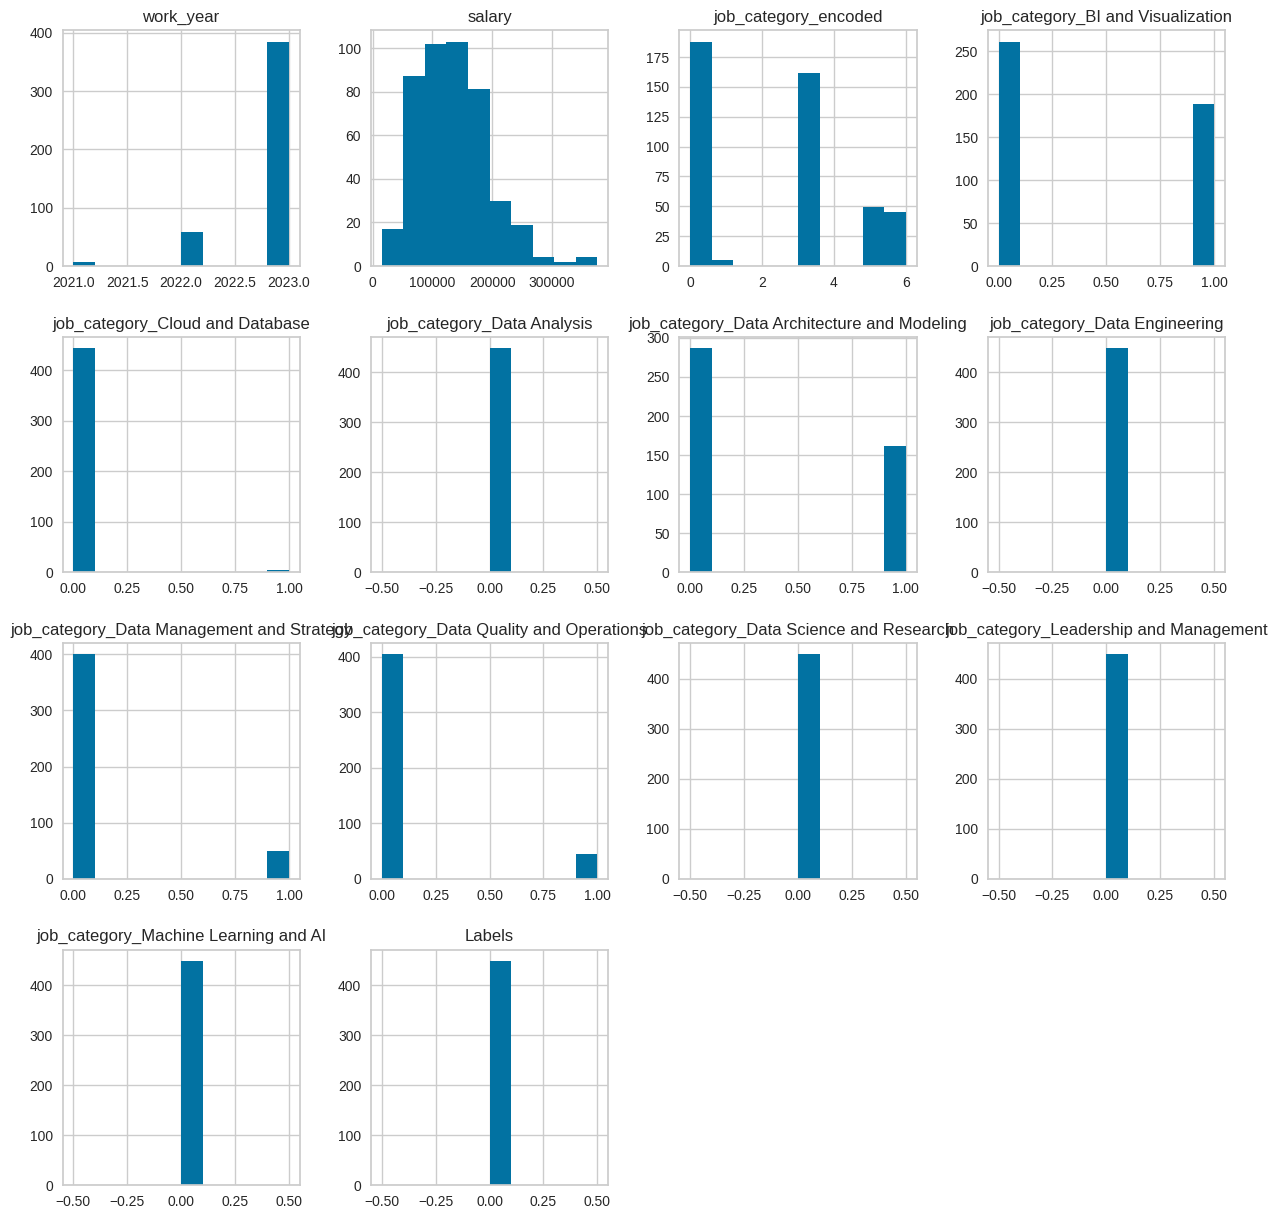

In [44]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

## Cluster 1

In [45]:
summary[1]

count           mean  \
work_year                                    1655.0    2022.657402   
salary                                       1655.0  156659.993958   
job_category_encoded                         1655.0       7.000000   
job_category_BI and Visualization            1655.0       0.000000   
job_category_Cloud and Database              1655.0       0.000000   
job_category_Data Analysis                   1655.0       0.000000   
job_category_Data Architecture and Modeling  1655.0       0.000000   
job_category_Data Engineering                1655.0       0.000000   
job_category_Data Management and Strategy    1655.0       0.000000   
job_category_Data Quality and Operations     1655.0       0.000000   
job_category_Data Science and Research       1655.0       1.000000   
job_category_Leadership and Management       1655.0       0.000000   
job_category_Machine Learning and AI         1655.0       0.000000   
Labels                                       1655.0       1.000000   

                                                      std      min       25%  \
work_year                                        0.645301   2020.0    2022.0   
salary                                       67145.400542  15662.0  111600.0   
job_category_encoded                             0.000000      7.0       7.0   
job_category_BI and Visualization                0.000000      0.0       0.0   
job_category_Cloud and Database                  0.000000      0.0       0.0   
job_category_Data Analysis                       0.000000      0.0       0.0   
job_category_Data Architecture and Modeling      0.000000      0.0       0.0   
job_category_Data Engineering                    0.000000      0.0       0.0   
job_category_Data Management and Strategy        0.000000      0.0       0.0   
job_category_Data Quality and Operations         0.000000      0.0       0.0   
job_category_Data Science and Research           0.000000      1.0       1.0   
job_category_Leadership and Management           0.000000      0.0       0.0   
job_category_Machine Learning and AI             0.000000      0.0       0.0   
Labels                                           0.000000      1.0       1.0   

                                                  50%       75%       max  
work_year                                      2023.0    2023.0    2023.0  
salary                                       152000.0  198250.0  450000.0  
job_category_encoded                              7.0       7.0       7.0  
job_category_BI and Visualization                 0.0       0.0       0.0  
job_category_Cloud and Database                   0.0       0.0       0.0  
job_category_Data Analysis                        0.0       0.0       0.0  
job_category_Data Architecture and Modeling       0.0       0.0       0.0  
job_category_Data Engineering                     0.0       0.0       0.0  
job_category_Data Management and Strategy         0.0       0.0       0.0  
job_category_Data Quality and Operations          0.0       0.0       0.0  
job_category_Data Science and Research            1.0       1.0       1.0  
job_category_Leadership and Management            0.0       0.0       0.0  
job_category_Machine Learning and AI              0.0       0.0       0.0  
Labels                                            1.0       1.0       1.0

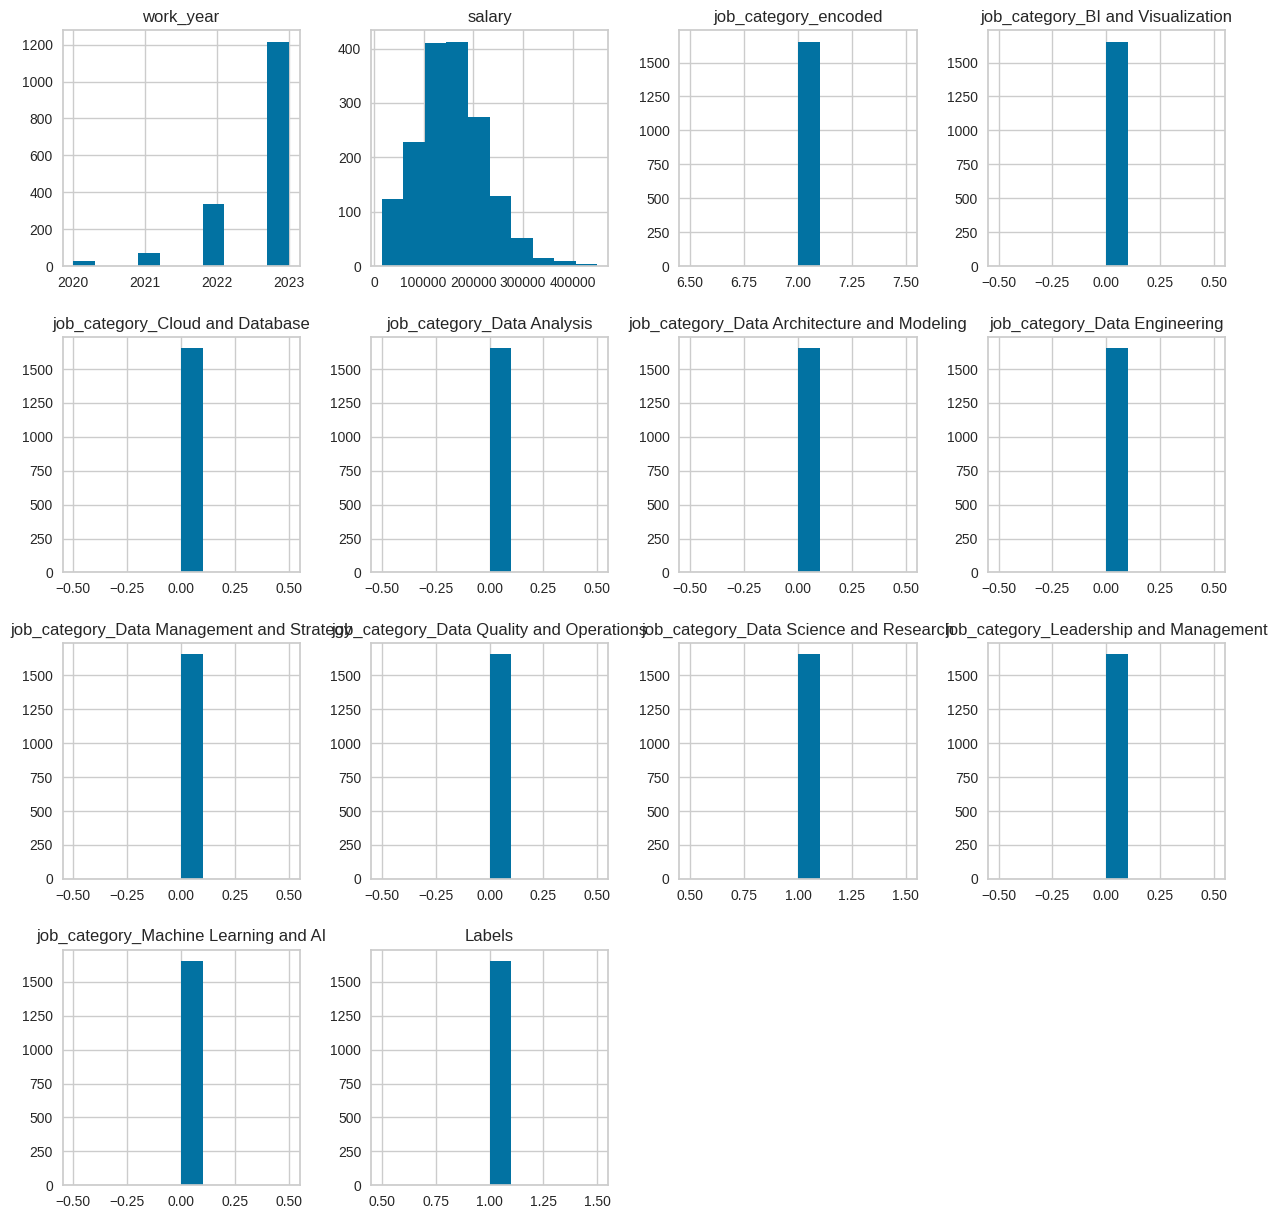

In [46]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

## Cluster 2

In [47]:
summary[2]

count           mean  \
work_year                                    809.0    2022.646477   
salary                                       809.0  105805.453646   
job_category_encoded                         809.0       2.000000   
job_category_BI and Visualization            809.0       0.000000   
job_category_Cloud and Database              809.0       0.000000   
job_category_Data Analysis                   809.0       1.000000   
job_category_Data Architecture and Modeling  809.0       0.000000   
job_category_Data Engineering                809.0       0.000000   
job_category_Data Management and Strategy    809.0       0.000000   
job_category_Data Quality and Operations     809.0       0.000000   
job_category_Data Science and Research       809.0       0.000000   
job_category_Leadership and Management       809.0       0.000000   
job_category_Machine Learning and AI         809.0       0.000000   
Labels                                       809.0       2.000000   

                                                      std      min      25%  \
work_year                                        0.639938   2020.0   2022.0   
salary                                       48619.252903  15000.0  70000.0   
job_category_encoded                             0.000000      2.0      2.0   
job_category_BI and Visualization                0.000000      0.0      0.0   
job_category_Cloud and Database                  0.000000      0.0      0.0   
job_category_Data Analysis                       0.000000      1.0      1.0   
job_category_Data Architecture and Modeling      0.000000      0.0      0.0   
job_category_Data Engineering                    0.000000      0.0      0.0   
job_category_Data Management and Strategy        0.000000      0.0      0.0   
job_category_Data Quality and Operations         0.000000      0.0      0.0   
job_category_Data Science and Research           0.000000      0.0      0.0   
job_category_Leadership and Management           0.000000      0.0      0.0   
job_category_Machine Learning and AI             0.000000      0.0      0.0   
Labels                                           0.000000      2.0      2.0   

                                                  50%       75%       max  
work_year                                      2023.0    2023.0    2023.0  
salary                                       100000.0  134000.0  385000.0  
job_category_encoded                              2.0       2.0       2.0  
job_category_BI and Visualization                 0.0       0.0       0.0  
job_category_Cloud and Database                   0.0       0.0       0.0  
job_category_Data Analysis                        1.0       1.0       1.0  
job_category_Data Architecture and Modeling       0.0       0.0       0.0  
job_category_Data Engineering                     0.0       0.0       0.0  
job_category_Data Management and Strategy         0.0       0.0       0.0  
job_category_Data Quality and Operations          0.0       0.0       0.0  
job_category_Data Science and Research            0.0       0.0       0.0  
job_category_Leadership and Management            0.0       0.0       0.0  
job_category_Machine Learning and AI              0.0       0.0       0.0  
Labels                                            2.0       2.0       2.0

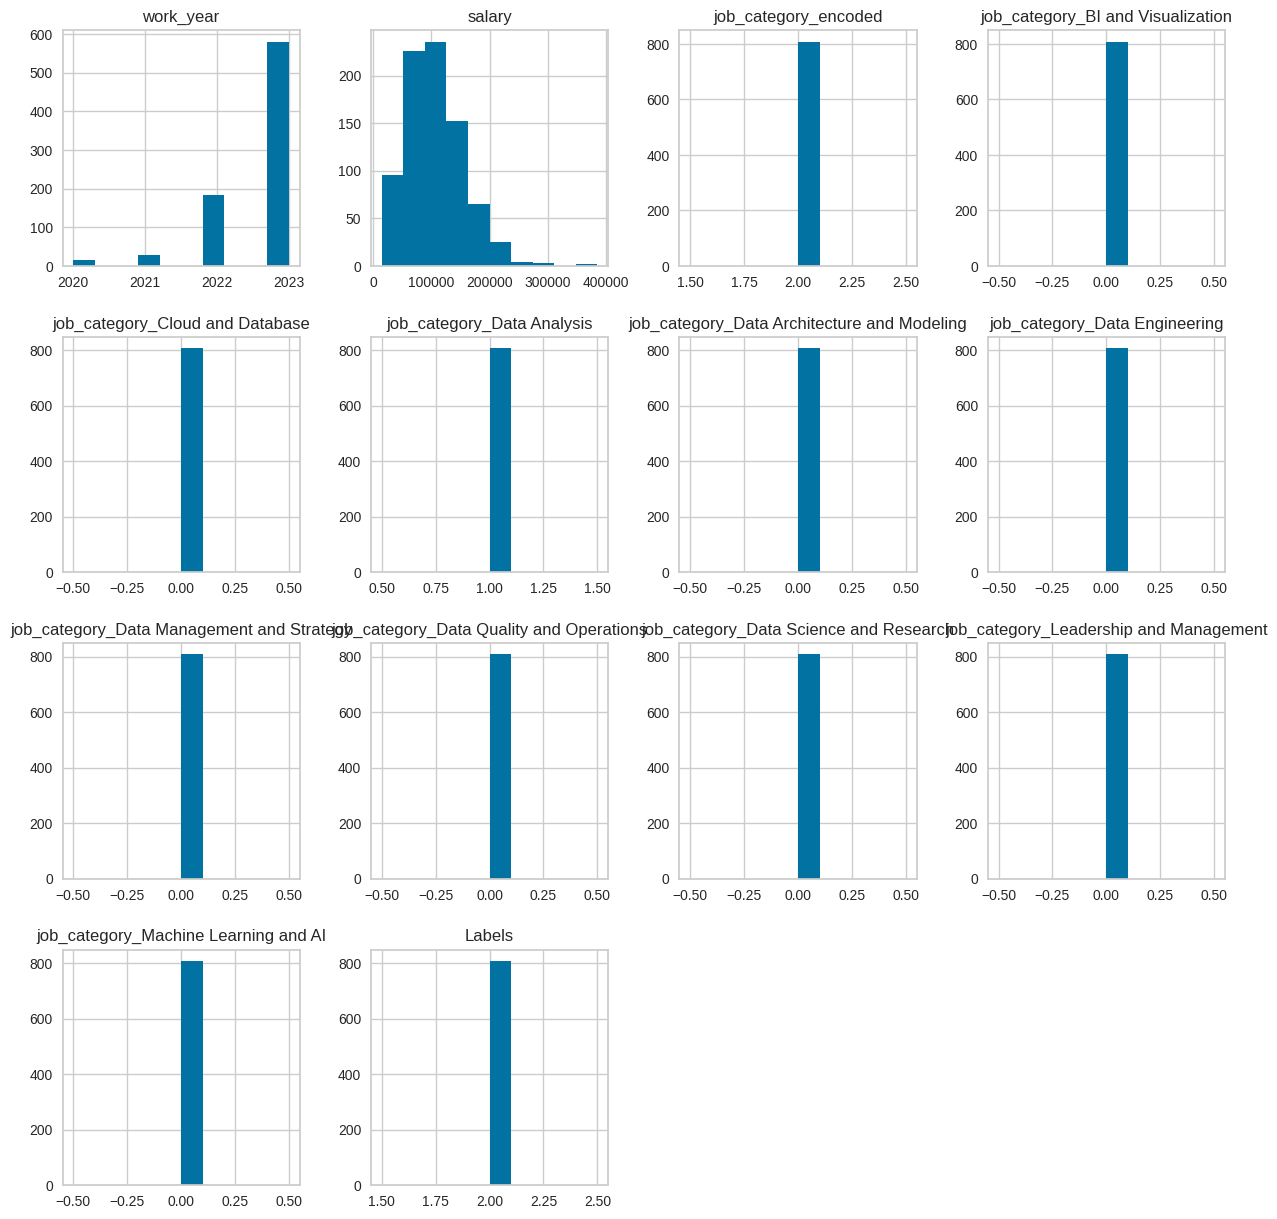

In [48]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));

## Cluster 3

In [49]:
summary[3]

count           mean  \
work_year                                    1160.0    2022.633621   
salary                                       1160.0  142121.087069   
job_category_encoded                         1160.0       4.000000   
job_category_BI and Visualization            1160.0       0.000000   
job_category_Cloud and Database              1160.0       0.000000   
job_category_Data Analysis                   1160.0       0.000000   
job_category_Data Architecture and Modeling  1160.0       0.000000   
job_category_Data Engineering                1160.0       1.000000   
job_category_Data Management and Strategy    1160.0       0.000000   
job_category_Data Quality and Operations     1160.0       0.000000   
job_category_Data Science and Research       1160.0       0.000000   
job_category_Leadership and Management       1160.0       0.000000   
job_category_Machine Learning and AI         1160.0       0.000000   
Labels                                       1160.0       3.000000   

                                                      std      min      25%  \
work_year                                        0.629508   2020.0   2022.0   
salary                                       63082.643814  18000.0  94450.0   
job_category_encoded                             0.000000      4.0      4.0   
job_category_BI and Visualization                0.000000      0.0      0.0   
job_category_Cloud and Database                  0.000000      0.0      0.0   
job_category_Data Analysis                       0.000000      0.0      0.0   
job_category_Data Architecture and Modeling      0.000000      0.0      0.0   
job_category_Data Engineering                    0.000000      1.0      1.0   
job_category_Data Management and Strategy        0.000000      0.0      0.0   
job_category_Data Quality and Operations         0.000000      0.0      0.0   
job_category_Data Science and Research           0.000000      0.0      0.0   
job_category_Leadership and Management           0.000000      0.0      0.0   
job_category_Machine Learning and AI             0.000000      0.0      0.0   
Labels                                           0.000000      3.0      3.0   

                                                  50%       75%       max  
work_year                                      2023.0    2023.0    2023.0  
salary                                       135000.0  183435.5  385000.0  
job_category_encoded                              4.0       4.0       4.0  
job_category_BI and Visualization                 0.0       0.0       0.0  
job_category_Cloud and Database                   0.0       0.0       0.0  
job_category_Data Analysis                        0.0       0.0       0.0  
job_category_Data Architecture and Modeling       0.0       0.0       0.0  
job_category_Data Engineering                     1.0       1.0       1.0  
job_category_Data Management and Strategy         0.0       0.0       0.0  
job_category_Data Quality and Operations          0.0       0.0       0.0  
job_category_Data Science and Research            0.0       0.0       0.0  
job_category_Leadership and Management            0.0       0.0       0.0  
job_category_Machine Learning and AI              0.0       0.0       0.0  
Labels                                            3.0       3.0       3.0

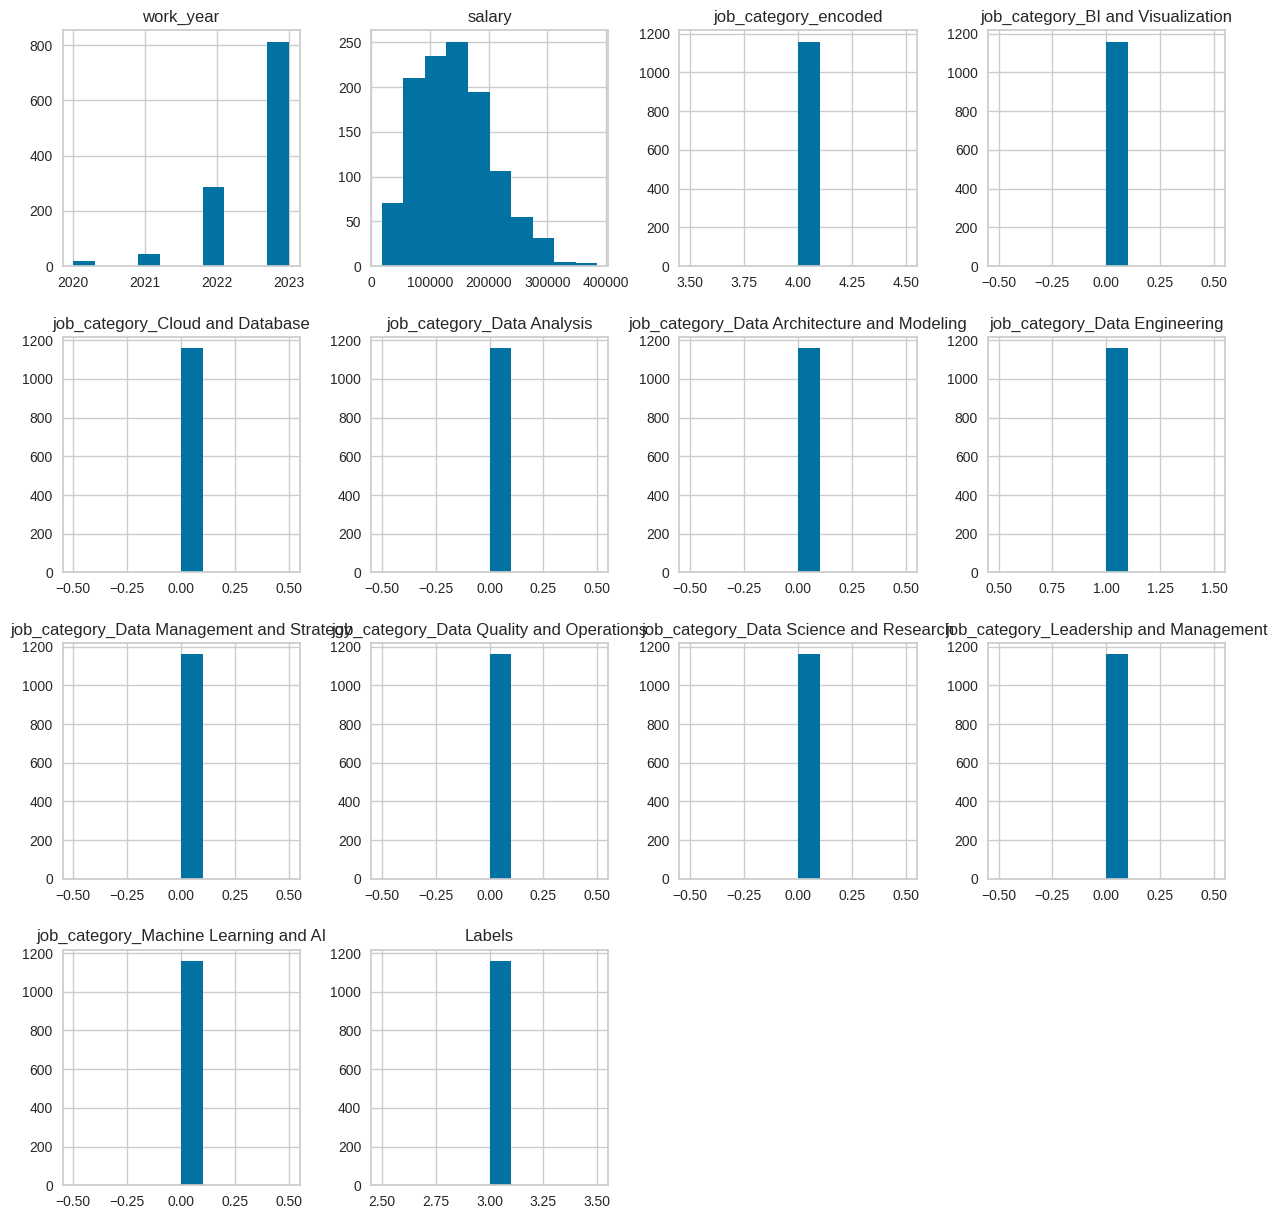

In [50]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

## Cluster 4

In [51]:
summary[4]

count           mean  \
work_year                                    917.0    2022.715376   
salary                                       917.0  171121.582334   
job_category_encoded                         917.0       9.000000   
job_category_BI and Visualization            917.0       0.000000   
job_category_Cloud and Database              917.0       0.000000   
job_category_Data Analysis                   917.0       0.000000   
job_category_Data Architecture and Modeling  917.0       0.000000   
job_category_Data Engineering                917.0       0.000000   
job_category_Data Management and Strategy    917.0       0.000000   
job_category_Data Quality and Operations     917.0       0.000000   
job_category_Data Science and Research       917.0       0.000000   
job_category_Leadership and Management       917.0       0.000000   
job_category_Machine Learning and AI         917.0       1.000000   
Labels                                       917.0       4.000000   

                                                      std      min       25%  \
work_year                                        0.591712   2020.0    2023.0   
salary                                       74314.487502  14000.0  123800.0   
job_category_encoded                             0.000000      9.0       9.0   
job_category_BI and Visualization                0.000000      0.0       0.0   
job_category_Cloud and Database                  0.000000      0.0       0.0   
job_category_Data Analysis                       0.000000      0.0       0.0   
job_category_Data Architecture and Modeling      0.000000      0.0       0.0   
job_category_Data Engineering                    0.000000      0.0       0.0   
job_category_Data Management and Strategy        0.000000      0.0       0.0   
job_category_Data Quality and Operations         0.000000      0.0       0.0   
job_category_Data Science and Research           0.000000      0.0       0.0   
job_category_Leadership and Management           0.000000      0.0       0.0   
job_category_Machine Learning and AI             0.000000      1.0       1.0   
Labels                                           0.000000      4.0       4.0   

                                                  50%       75%       max  
work_year                                      2023.0    2023.0    2023.0  
salary                                       170000.0  218000.0  423000.0  
job_category_encoded                              9.0       9.0       9.0  
job_category_BI and Visualization                 0.0       0.0       0.0  
job_category_Cloud and Database                   0.0       0.0       0.0  
job_category_Data Analysis                        0.0       0.0       0.0  
job_category_Data Architecture and Modeling       0.0       0.0       0.0  
job_category_Data Engineering                     0.0       0.0       0.0  
job_category_Data Management and Strategy         0.0       0.0       0.0  
job_category_Data Quality and Operations          0.0       0.0       0.0  
job_category_Data Science and Research            0.0       0.0       0.0  
job_category_Leadership and Management            0.0       0.0       0.0  
job_category_Machine Learning and AI              1.0       1.0       1.0  
Labels                                            4.0       4.0       4.0

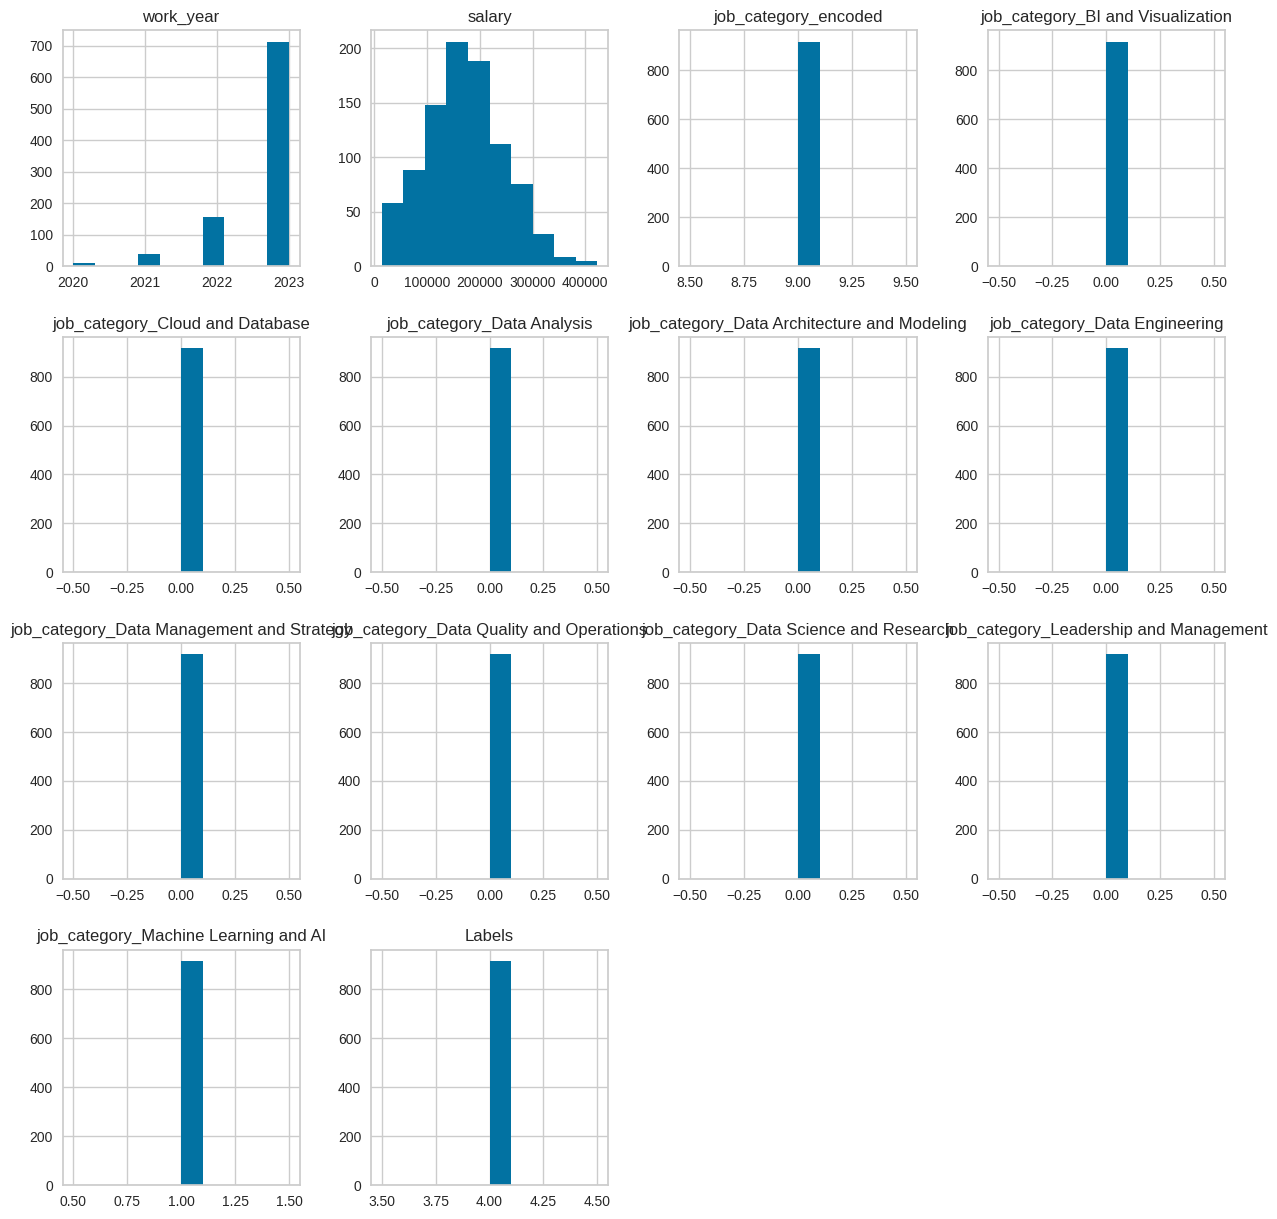

In [52]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

## Cluster 5

In [53]:
summary[5]

count           mean  \
work_year                                    351.0    2022.746439   
salary                                       351.0  147288.199430   
job_category_encoded                         351.0       8.000000   
job_category_BI and Visualization            351.0       0.000000   
job_category_Cloud and Database              351.0       0.000000   
job_category_Data Analysis                   351.0       0.000000   
job_category_Data Architecture and Modeling  351.0       0.000000   
job_category_Data Engineering                351.0       0.000000   
job_category_Data Management and Strategy    351.0       0.000000   
job_category_Data Quality and Operations     351.0       0.000000   
job_category_Data Science and Research       351.0       0.000000   
job_category_Leadership and Management       351.0       1.000000   
job_category_Machine Learning and AI         351.0       0.000000   
Labels                                       351.0       5.000000   

                                                      std      min       25%  \
work_year                                        0.491159   2021.0    2023.0   
salary                                       60713.869132  20000.0  109640.0   
job_category_encoded                             0.000000      8.0       8.0   
job_category_BI and Visualization                0.000000      0.0       0.0   
job_category_Cloud and Database                  0.000000      0.0       0.0   
job_category_Data Analysis                       0.000000      0.0       0.0   
job_category_Data Architecture and Modeling      0.000000      0.0       0.0   
job_category_Data Engineering                    0.000000      0.0       0.0   
job_category_Data Management and Strategy        0.000000      0.0       0.0   
job_category_Data Quality and Operations         0.000000      0.0       0.0   
job_category_Data Science and Research           0.000000      0.0       0.0   
job_category_Leadership and Management           0.000000      1.0       1.0   
job_category_Machine Learning and AI             0.000000      0.0       0.0   
Labels                                           0.000000      5.0       5.0   

                                                  50%       75%       max  
work_year                                      2023.0    2023.0    2023.0  
salary                                       140000.0  180750.0  405000.0  
job_category_encoded                              8.0       8.0       8.0  
job_category_BI and Visualization                 0.0       0.0       0.0  
job_category_Cloud and Database                   0.0       0.0       0.0  
job_category_Data Analysis                        0.0       0.0       0.0  
job_category_Data Architecture and Modeling       0.0       0.0       0.0  
job_category_Data Engineering                     0.0       0.0       0.0  
job_category_Data Management and Strategy         0.0       0.0       0.0  
job_category_Data Quality and Operations          0.0       0.0       0.0  
job_category_Data Science and Research            0.0       0.0       0.0  
job_category_Leadership and Management            1.0       1.0       1.0  
job_category_Machine Learning and AI              0.0       0.0       0.0  
Labels                                            5.0       5.0       5.0

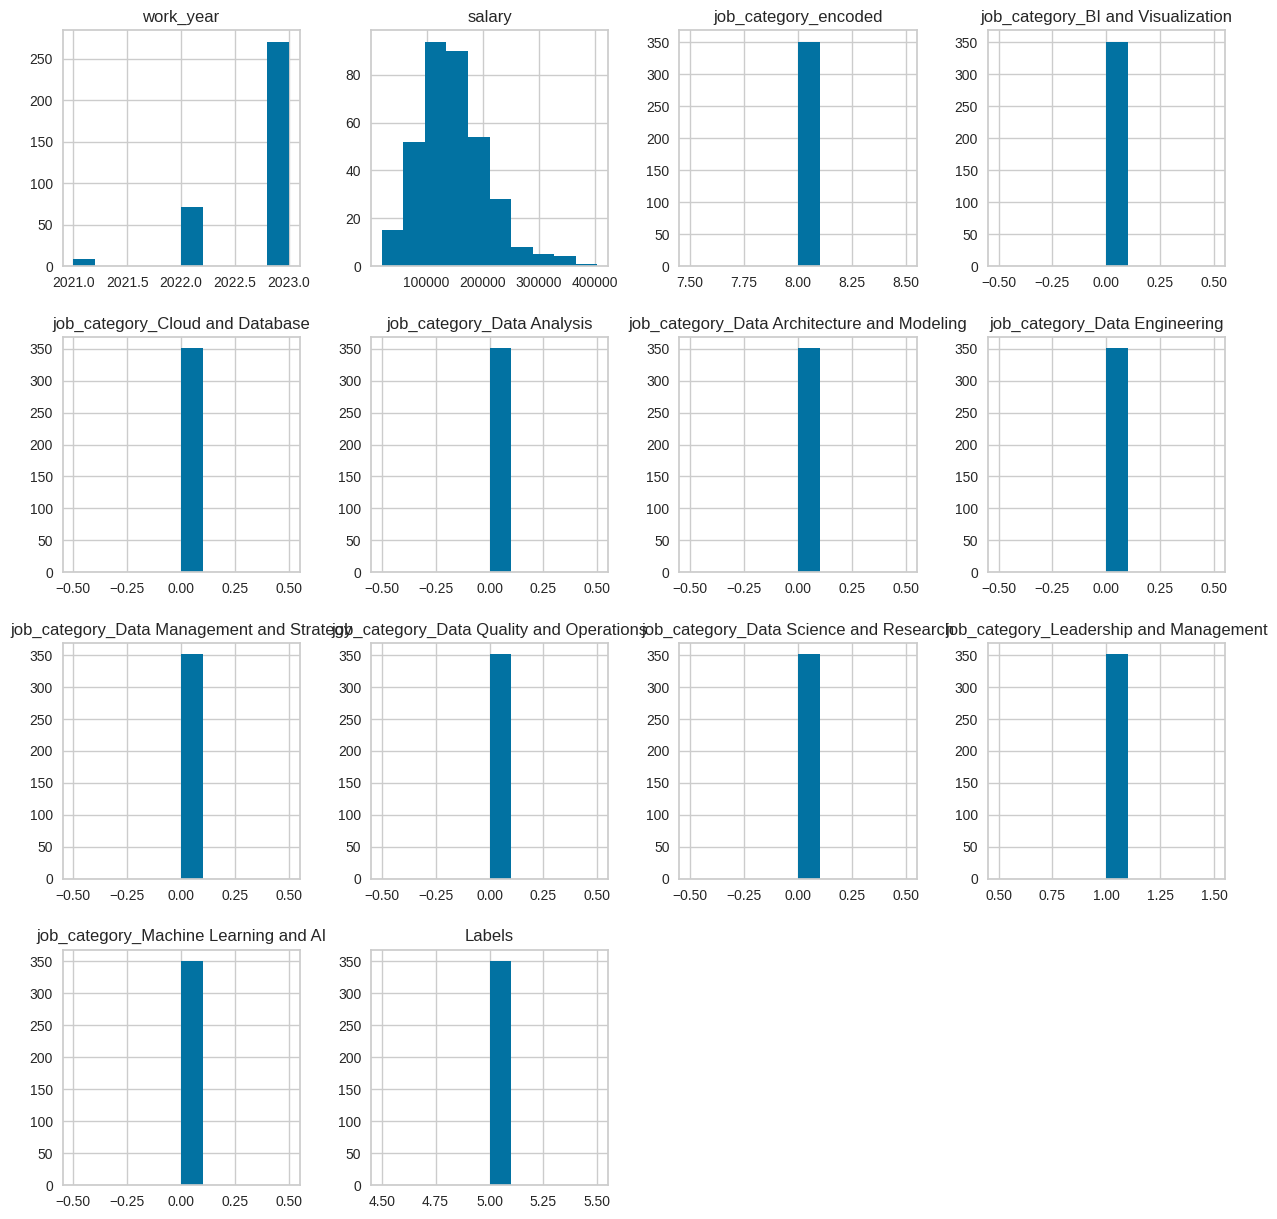

In [54]:
results_df[results_df['Labels'] == 5].hist(figsize=(15,15));

# **Hierarchical Clustering**

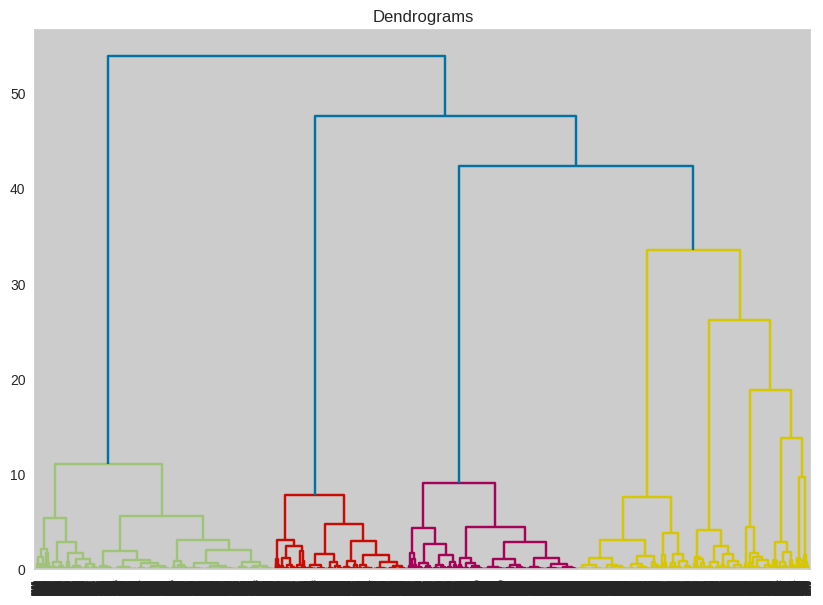

In [55]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [56]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
hcluster.fit_predict(X)

array([3, 0, 0, ..., 1, 1, 4])

In [57]:
labels = hcluster.labels_
X_pca_df['Labels'] = labels

In [58]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()